<a href="https://colab.research.google.com/github/kerenslendyrc/Estadistica/blob/main/defunciones_no_fetales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving BD-EEVV-Defuncionesnofetales-2024.csv to BD-EEVV-Defuncionesnofetales-2024.csv


In [3]:
df = pd.read_csv('BD-EEVV-Defuncionesnofetales-2024.csv', encoding='latin-1')


In [4]:
print("Dimensiones del dataset:", df.shape)
print("\nPrimeras 10 filas:")
df.head(10)

Dimensiones del dataset: (275778, 61)

Primeras 10 filas:


,COD_DPTO,COD_MUNIC,A_DEFUN,SIT_DEFUN,OTRSITIODE,TIPO_DEFUN,ANO,MES,HORA,MINUTOS,...,C_MUERTEE,C_MUERTEF,C_MUERTEG,ASIS_MED,CAUSA_MULT,C_BAS1,CAUSA_667,IDPROFCER,CAU_HOMOL,TIPOFORMULARIO
0,73,854,3,3,NaN,2,2024,8,NaN,NaN,...,NaN,NaN,NaN,2,I219*F03,I219,303,1,51,1
1,11,1,1,1,NaN,2,2024,9,0.0,12.0,...,NaN,NaN,NaN,1,C833*I10 E119,C833,213,1,36,1
2,63,1,9,2,NaN,2,2024,11,0.0,0.0,...,NaN,NaN,NaN,2,R572/Z998/J189/S097 W55,W559,510,1,105,1
3,11,1,1,1,NaN,2,2024,9,1.0,40.0,...,NaN,NaN,NaN,1,R578/I639/I10*E039 E119 E785,I639,307,1,55,1
4,23,1,1,1,NaN,2,2024,10,2.0,39.0,...,NaN,NaN,NaN,1,R001/G909/C189*N19,G909,604,1,47,1
5,8,1,1,1,NaN,2,2024,10,10.0,35.0,...,NaN,NaN,NaN,1,R572/J961/G938*C539,G938,604,1,47,1
6,20,1,1,1,NaN,2,2024,10,15.0,12.0,...,NaN,NaN,NaN,1,I469/J969/N179 N19 Z491 E872/G938 K729 G934 N1...,G938,604,1,47,1
7,63,1,1,1,NaN,2,2024,10,6.0,30.0,...,NaN,NaN,NaN,1,L089/I830*I10,I832,309,1,58,1
8,5,1,1,1,NaN,2,2024,10,0.0,30.0,...,NaN,NaN,NaN,1,R090/R570/R571/K922*I859,I850,309,1,58,1
9,25,754,1,1,NaN,2,2024,12,21.0,0.0,...,NaN,NaN,NaN,1,R570/I259/I251*I739 I10,I251,303,1,51,1


In [5]:
# Información de variables
print("\nInformación del dataset:")
df.info()

# Nombres de columnas
print("\nNombre de columnas:")
print(df.columns.tolist())


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275778 entries, 0 to 275777
Data columns (total 61 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   COD_DPTO        275778 non-null  int64  
 1   COD_MUNIC       275778 non-null  int64  
 2   A_DEFUN         275778 non-null  int64  
 3   SIT_DEFUN       275778 non-null  int64  
 4   OTRSITIODE      7713 non-null    object 
 5   TIPO_DEFUN      275778 non-null  int64  
 6   ANO             275778 non-null  int64  
 7   MES             275778 non-null  int64  
 8   HORA            268273 non-null  float64
 9   MINUTOS         268273 non-null  float64
 10  CODPAISNACFAL   236617 non-null  float64
 11  SEXO            275778 non-null  int64  
 12  EST_CIVIL       275778 non-null  int64  
 13  GRU_ED1         275778 non-null  int64  
 14  GRU_ED2         275778 non-null  int64  
 15  NIVEL_EDU       275778 non-null  int64  
 16  ULTCURFAL       275778 non-nul

In [6]:
# Estadísticas descriptivas básicas
print("Estadísticas descriptivas:")
df.describe(include='all')

# Verificar valores nulos
print("\nValores nulos por columna:")
null_sum = df.isnull().sum()
null_pct = (df.isnull().sum() / len(df)) * 100
pd.DataFrame({'Cantidad_Nulos': null_sum, 'Porcentaje_Nulos': null_pct})

Estadísticas descriptivas:

Valores nulos por columna:


,Cantidad_Nulos,Porcentaje_Nulos
COD_DPTO,0,0.000000
COD_MUNIC,0,0.000000
A_DEFUN,0,0.000000
SIT_DEFUN,0,0.000000
OTRSITIODE,268065,97.203185
...,...,...
C_BAS1,0,0.000000
CAUSA_667,0,0.000000
IDPROFCER,0,0.000000
CAU_HOMOL,0,0.000000


In [7]:
# Eliminar columnas completamente vacías
df = df.dropna(axis=1, how='all')

# Eliminar duplicados
print(f"Filas antes de eliminar duplicados: {len(df)}")
df = df.drop_duplicates()
print(f"Filas después de eliminar duplicados: {len(df)}")

Filas antes de eliminar duplicados: 275778
Filas después de eliminar duplicados: 275676


In [8]:
# Seleccionar columnas categóricas
categorical_cols = df.select_dtypes(include=['object']).columns

print("Análisis de variables categóricas:")
for col in categorical_cols:
    print(f"\n--- {col} ---")
    print(f"Valores únicos: {df[col].nunique()}")
    if df[col].nunique() < 20:  # Mostrar solo si tiene pocas categorías
        print(df[col].value_counts())

        # Gráfico de barras
        plt.figure(figsize=(10, 4))
        df[col].value_counts().plot(kind='bar')
        plt.title(f'Distribución de {col}')
        plt.xticks(rotation=45)
        plt.show()

Análisis de variables categóricas:

--- OTRSITIODE ---
Valores únicos: 1353

--- OCUPACION ---
Valores únicos: 385

--- CAUSA_MULT ---
Valores únicos: 192805

--- C_BAS1 ---
Valores únicos: 3354


In [10]:
gru_ed1_map = {
    0: 'Menor de una hora',
    1: 'Menor de un día',
    2: 'De 1 a 6 días',
    3: 'De 7 a 27 días',
    4: 'De 28 a 29 días',
    5: 'De 1 a 5 meses',
    6: 'De 6 a 11 meses',
    7: 'De 1 año',
    8: 'De 2 a 4 años',
    9: 'De 5 a 9 años',
    10: 'De 10 a 14 años',
    11: 'De 15 a 19 años',
    12: 'De 20 a 24 años',
    13: 'De 25 a 29 años',
    14: 'De 30 a 34 años',
    15: 'De 35 a 39 años',
    16: 'De 40 a 44 años',
    17: 'De 45 a 49 años',
    18: 'De 50 a 54 años',
    19: 'De 55 a 59 años',
    20: 'De 60 a 64 años',
    21: 'De 65 a 69 años',
    22: 'De 70 a 74 años',
    23: 'De 75 a 79 años',
    24: 'De 80 a 84 años',
    25: 'De 85 a 89 años',
    26: 'De 90 a 94 años',
    27: 'De 95 a 99 años',
    28: 'De 100 años y más',
    29: 'Edad desconocida'
}

df['GRU_ED1_STR'] = df['GRU_ED1'].map(gru_ed1_map)

print("Valores únicos en GRU_ED1:", sorted(df['GRU_ED1'].unique()))
print("\nValores sin mapear:", df[df['GRU_ED1_STR'].isnull()]['GRU_ED1'].unique())

Valores únicos en GRU_ED1: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29)]

Valores sin mapear: []


=== ESTADÍSTICAS DESCRIPTIVAS GRU_ED1 ===
Total de registros: 275,676
Grupo de edad más frecuente: De 80 a 84 años (33,218 defunciones)
Grupo de edad menos frecuente: De 28 a 29 días (49 defunciones)

Top 5 grupos de edad con más defunciones:
1. Menor de una hora: 232 (0.1%)
2. Menor de un día: 512 (0.2%)
3. De 1 a 6 días: 1,255 (0.5%)
4. De 7 a 27 días: 983 (0.4%)
5. De 28 a 29 días: 49 (0.0%)


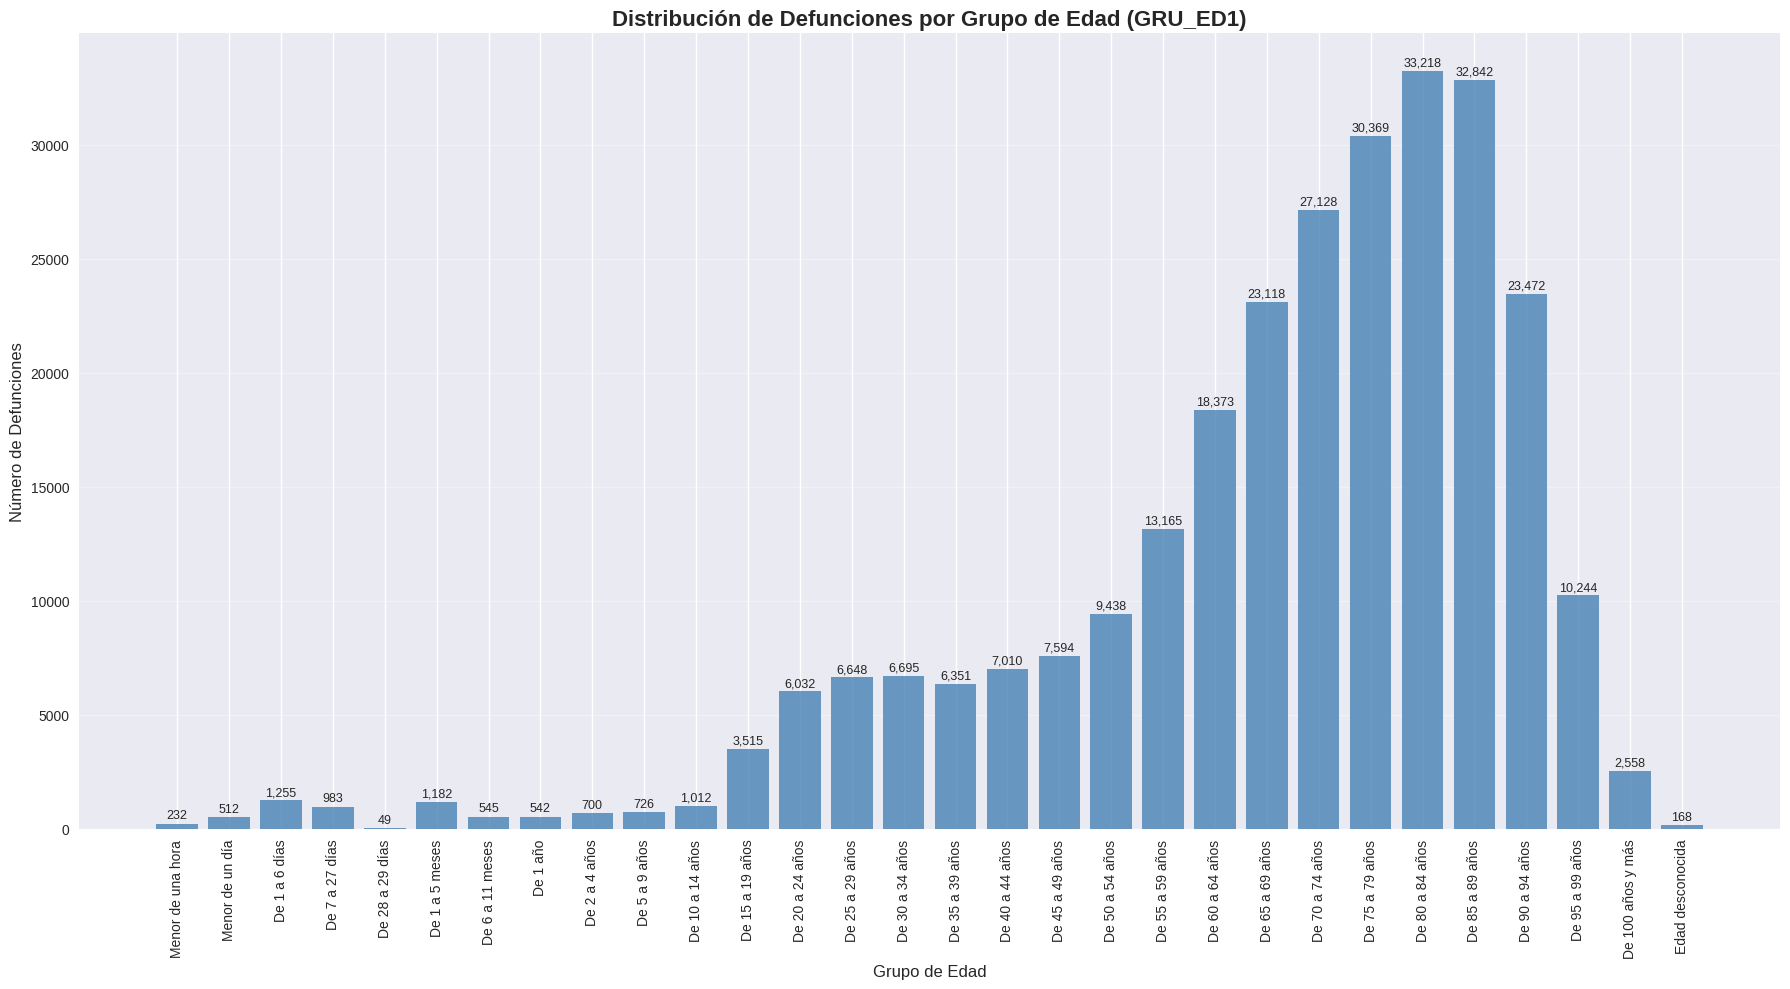

In [11]:
# Crear el histograma
plt.figure(figsize=(18, 10))

# Ordenar por el código original para mantener la secuencia lógica de edades
orden_categorias = [gru_ed1_map[i] for i in sorted(gru_ed1_map.keys())]
conteos = df['GRU_ED1_STR'].value_counts().reindex(orden_categorias)

# Crear el gráfico de barras
bars = plt.bar(range(len(conteos)), conteos.values, color='steelblue', alpha=0.8)

# Personalizar el gráfico
plt.title('Distribución de Defunciones por Grupo de Edad (GRU_ED1)', fontsize=16, fontweight='bold')
plt.xlabel('Grupo de Edad', fontsize=12)
plt.ylabel('Número de Defunciones', fontsize=12)
plt.xticks(range(len(conteos)), conteos.index, rotation=90, fontsize=10)
plt.grid(axis='y', alpha=0.3)

# Añadir valores en las barras
for bar in bars:
    height = bar.get_height()
    if height > 0:  # Solo mostrar texto si el valor es mayor a 0
        plt.text(bar.get_x() + bar.get_width()/2., height + 100,
                f'{int(height):,}', ha='center', va='bottom', fontsize=9)

# Ajustar los márgenes
plt.tight_layout()

# Mostrar estadísticas descriptivas
print("=== ESTADÍSTICAS DESCRIPTIVAS GRU_ED1 ===")
print(f"Total de registros: {len(df):,}")
print(f"Grupo de edad más frecuente: {conteos.idxmax()} ({conteos.max():,} defunciones)")
print(f"Grupo de edad menos frecuente: {conteos.idxmin()} ({conteos.min():,} defunciones)")

# Calcular porcentajes
print("\nTop 5 grupos de edad con más defunciones:")
top_5 = conteos.head()
for i, (grupo, conteo) in enumerate(top_5.items(), 1):
    porcentaje = (conteo / len(df)) * 100
    print(f"{i}. {grupo}: {conteo:,} ({porcentaje:.1f}%)")

plt.show()

<Figure size 1800x1000 with 0 Axes>

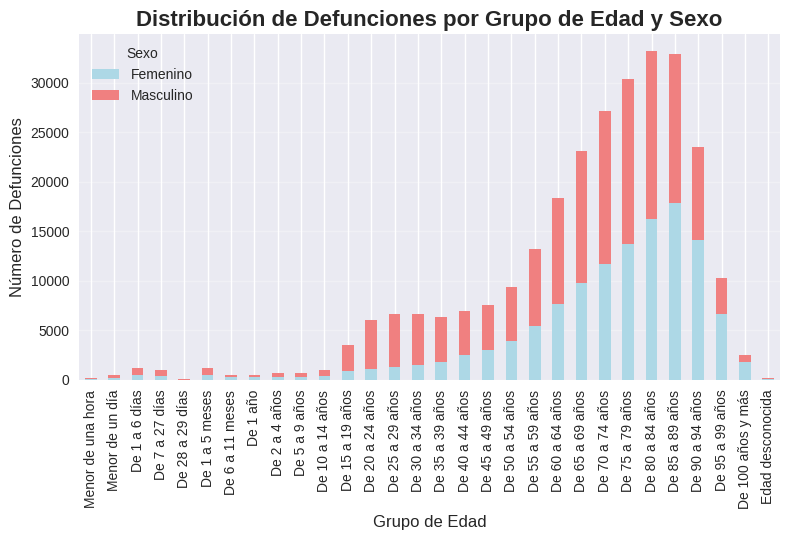


PROPORCIÓN POR SEXO EN LOS 5 GRUPOS MÁS FRECUENTES:
Menor de una hora: Masculino 59.9% - Femenino 40.1%
Menor de un día: Masculino 54.1% - Femenino 45.9%
De 1 a 6 días: Masculino 60.8% - Femenino 39.2%
De 7 a 27 días: Masculino 55.8% - Femenino 44.2%
De 28 a 29 días: Masculino 51.0% - Femenino 49.0%


In [12]:
# Análisis adicional: Distribución por sexo dentro de los grupos de edad
if 'SEXO' in df.columns:
    # Mapear sexo
    sexo_map = {1: 'Masculino', 2: 'Femenino', 9: 'No especificado'}
    df['SEXO_STR'] = df['SEXO'].map(sexo_map)

    # Crear tabla cruzada
    cross_edad_sexo = pd.crosstab(df['GRU_ED1_STR'], df['SEXO_STR']).reindex(orden_categorias)

    # Gráfico de barras apiladas
    plt.figure(figsize=(18, 10))
    cross_edad_sexo.plot(kind='bar', stacked=True, color=['lightblue', 'lightcoral', 'gray'])
    plt.title('Distribución de Defunciones por Grupo de Edad y Sexo', fontsize=16, fontweight='bold')
    plt.xlabel('Grupo de Edad', fontsize=12)
    plt.ylabel('Número de Defunciones', fontsize=12)
    plt.xticks(rotation=90)
    plt.legend(title='Sexo')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Mostrar proporciones por sexo en los principales grupos
    print("\nPROPORCIÓN POR SEXO EN LOS 5 GRUPOS MÁS FRECUENTES:")
    top_5_grupos = conteos.head().index
    for grupo in top_5_grupos:
        if grupo in cross_edad_sexo.index:
            total_grupo = cross_edad_sexo.loc[grupo].sum()
            prop_masc = (cross_edad_sexo.loc[grupo, 'Masculino'] / total_grupo) * 100
            prop_fem = (cross_edad_sexo.loc[grupo, 'Femenino'] / total_grupo) * 100
            print(f"{grupo}: Masculino {prop_masc:.1f}% - Femenino {prop_fem:.1f}%")

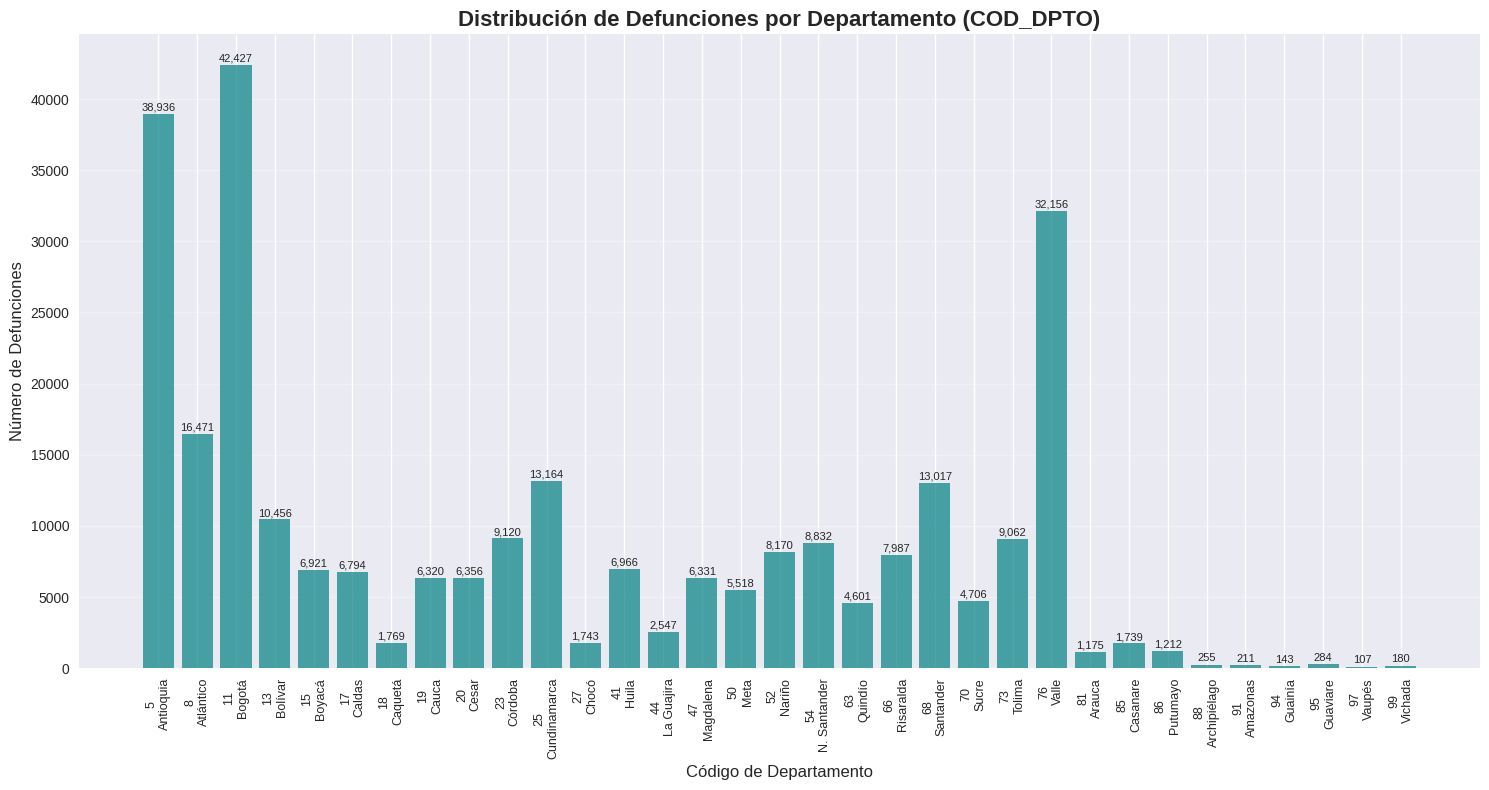

Total departamentos: 33
Departamento con más defunciones: Código 5 (38,936 casos)
Departamento con menos defunciones: Código 99 (180 casos)


In [13]:
# Histograma 1: COD_DPTO - Departamento donde ocurrió la defunción
plt.figure(figsize=(15, 8))
depto_counts = df['COD_DPTO'].value_counts().sort_index()

# Mapeo de algunos departamentos comunes (puedes ampliar este diccionario)
depto_names = {
    5: 'Antioquia', 8: 'Atlántico', 11: 'Bogotá', 13: 'Bolívar', 15: 'Boyacá',
    17: 'Caldas', 18: 'Caquetá', 19: 'Cauca', 20: 'Cesar', 23: 'Córdoba',
    25: 'Cundinamarca', 27: 'Chocó', 41: 'Huila', 44: 'La Guajira',
    47: 'Magdalena', 50: 'Meta', 52: 'Nariño', 54: 'N. Santander',
    63: 'Quindío', 66: 'Risaralda', 68: 'Santander', 70: 'Sucre',
    73: 'Tolima', 76: 'Valle', 81: 'Arauca', 85: 'Casanare',
    86: 'Putumayo', 88: 'Archipiélago', 91: 'Amazonas', 94: 'Guainía',
    95: 'Guaviare', 97: 'Vaupés', 99: 'Vichada'
}

# Crear etiquetas para el gráfico
labels = [f"{code}\n{depto_names.get(code, '')}" for code in depto_counts.index]

bars = plt.bar(range(len(depto_counts)), depto_counts.values, color='teal', alpha=0.7)
plt.title('Distribución de Defunciones por Departamento (COD_DPTO)', fontsize=16, fontweight='bold')
plt.xlabel('Código de Departamento', fontsize=12)
plt.ylabel('Número de Defunciones', fontsize=12)
plt.xticks(range(len(depto_counts)), labels, rotation=90, fontsize=9)
plt.grid(axis='y', alpha=0.3)

# Añadir valores en las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 100,
            f'{int(height):,}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

print(f"Total departamentos: {len(depto_counts)}")
print(f"Departamento con más defunciones: Código {depto_counts.index[0]} ({depto_counts.iloc[0]:,} casos)")
print(f"Departamento con menos defunciones: Código {depto_counts.index[-1]} ({depto_counts.iloc[-1]:,} casos)")

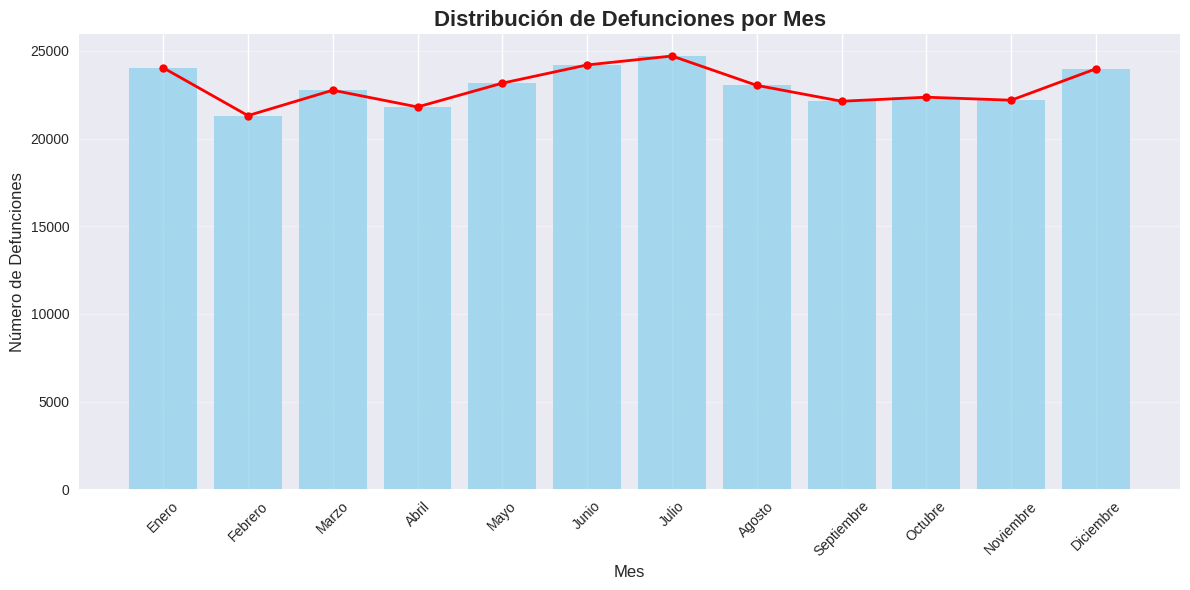

Mes con más defunciones: Julio (24,709 casos)
Mes con menos defunciones: Febrero (21,310 casos)


In [15]:
# Histograma 2: MES - Mes de defunción
plt.figure(figsize=(12, 6))
mes_map = {
    1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 5: 'Mayo', 6: 'Junio',
    7: 'Julio', 8: 'Agosto', 9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'
}

mes_counts = df['MES'].value_counts().sort_index()
labels = [mes_map.get(mes, f'Mes {mes}') for mes in mes_counts.index]

plt.bar(range(len(mes_counts)), mes_counts.values, color='skyblue', alpha=0.7)
plt.title('Distribución de Defunciones por Mes', fontsize=16, fontweight='bold')
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Número de Defunciones', fontsize=12)
plt.xticks(range(len(mes_counts)), labels, rotation=45, fontsize=10)
plt.grid(axis='y', alpha=0.3)

# Añadir línea de tendencia
plt.plot(range(len(mes_counts)), mes_counts.values, color='red', marker='o', linewidth=2, markersize=6)

plt.tight_layout()
plt.show()

print(f"Mes con más defunciones: {mes_map.get(mes_counts.idxmax())} ({mes_counts.max():,} casos)")
print(f"Mes con menos defunciones: {mes_map.get(mes_counts.idxmin())} ({mes_counts.min():,} casos)")

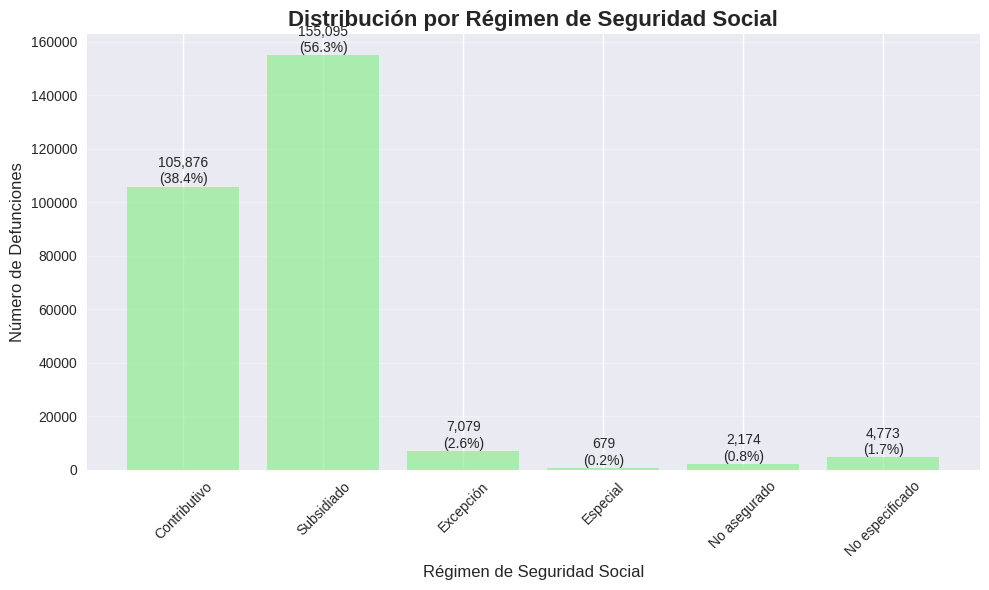

In [16]:
# Histograma 3: SEG_SOCIAL - Régimen de seguridad social
plt.figure(figsize=(10, 6))
seguridad_map = {
    1: 'Contributivo',
    2: 'Subsidiado',
    3: 'Excepción',
    4: 'Especial',
    5: 'No asegurado',
    9: 'No especificado'
}

seg_counts = df['SEG_SOCIAL'].value_counts().sort_index()
labels = [seguridad_map.get(code, f'Código {code}') for code in seg_counts.index]

bars = plt.bar(range(len(seg_counts)), seg_counts.values, color='lightgreen', alpha=0.7)
plt.title('Distribución por Régimen de Seguridad Social', fontsize=16, fontweight='bold')
plt.xlabel('Régimen de Seguridad Social', fontsize=12)
plt.ylabel('Número de Defunciones', fontsize=12)
plt.xticks(range(len(seg_counts)), labels, rotation=45, fontsize=10)
plt.grid(axis='y', alpha=0.3)

# Añadir porcentajes
total = len(df)
for i, bar in enumerate(bars):
    height = bar.get_height()
    percentage = (height / total) * 100
    plt.text(bar.get_x() + bar.get_width()/2., height + 100,
            f'{int(height):,}\n({percentage:.1f}%)', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [19]:
# Verificar los valores únicos en P_PMAN_IRIS
valores_unicos = sorted(df['P_PMAN_IRIS'].unique())
print("Valores únicos en P_PMAN_IRIS:", valores_unicos)

# Contar frecuencia de cada código
conteo_completo = df['P_PMAN_IRIS'].value_counts().sort_index()
print("\nConteo completo de P_PMAN_IRIS:")
for codigo, conteo in conteo_completo.items():
    print(f"Código {codigo}: {conteo:,} casos ({conteo/len(df)*100:.2f}%)")

Valores únicos en P_PMAN_IRIS: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(8)]

Conteo completo de P_PMAN_IRIS:
Código 0: 240,240 casos (87.15%)
Código 1: 14,150 casos (5.13%)
Código 2: 14,245 casos (5.17%)
Código 3: 1,618 casos (0.59%)
Código 4: 3,064 casos (1.11%)
Código 5: 2,353 casos (0.85%)
Código 8: 6 casos (0.00%)


Códigos presentes en los datos y su significado:
Código 0: No aplica o no especificado (posiblemente para muertes fetales) (240,240 casos)
Código 1: Muerte natural (14,150 casos)
Código 2: Accidente (14,245 casos)
Código 3: Suicidio (1,618 casos)
Código 4: Homicidio (3,064 casos)
Código 5: Violencia interpersonal (2,353 casos)
Código 8: Otra causa externa no clasificada en otra parte (6 casos)


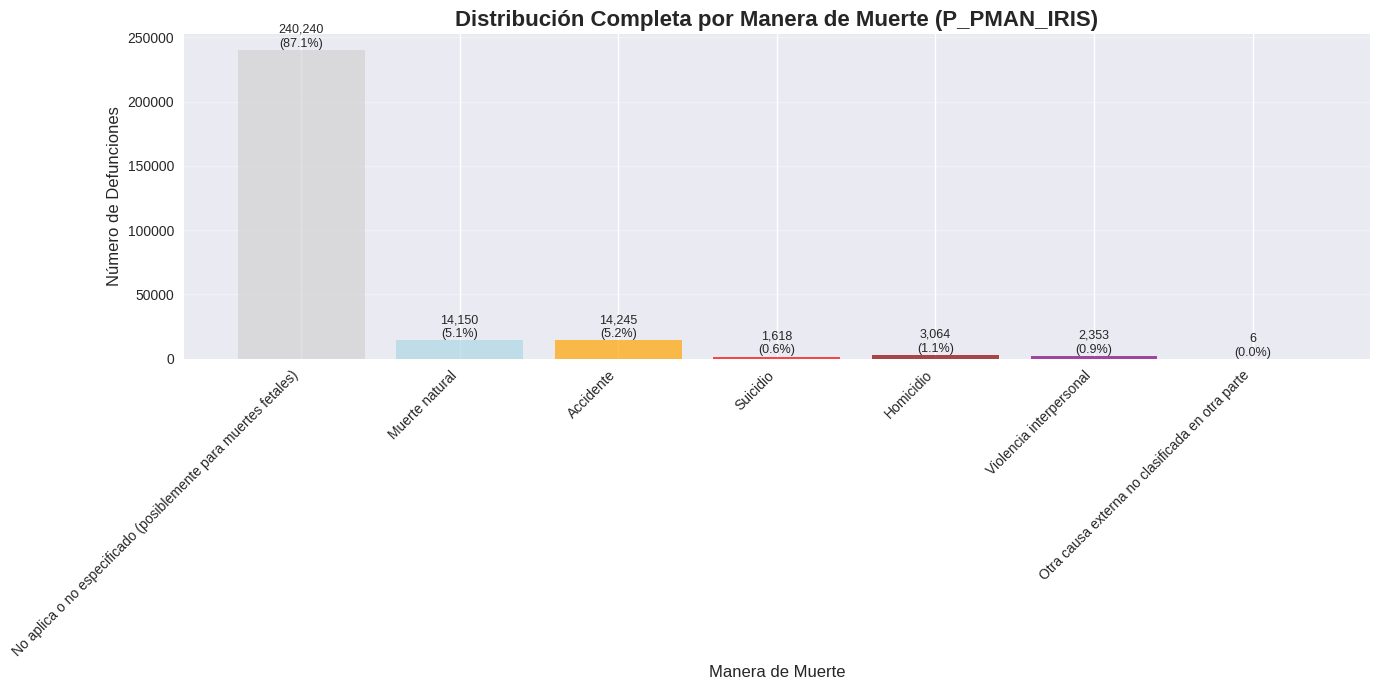

In [24]:
# Histograma 4: P_PMAN_IRIS - Manera de muerte

manera_muerte_completa = {
    0: 'No aplica o no especificado (posiblemente para muertes fetales)',
    1: 'Muerte natural',
    2: 'Accidente',
    3: 'Suicidio',
    4: 'Homicidio',
    5: 'Violencia interpersonal',
    6: 'Intervención legal',
    7: 'Evento de intención no determinada',
    8: 'Otra causa externa no clasificada en otra parte',
    9: 'No especificado/Desconocido'
}

# Verificar si existen estos códigos en nuestros datos
print("Códigos presentes en los datos y su significado:")
for codigo in valores_unicos:
    significado = manera_muerte_completa.get(codigo, 'Significado no definido')
    conteo = conteo_completo.get(codigo, 0)
    print(f"Código {codigo}: {significado} ({conteo:,} casos)")  # Histograma actualizado con todos los códigos
plt.figure(figsize=(14, 7))

manera_counts = df['P_PMAN_IRIS'].value_counts().sort_index()
labels = [manera_muerte_completa.get(code, f'Código {code}') for code in manera_counts.index]

# Crear colores diferenciados
colors = ['lightgray', 'lightblue', 'orange', 'red', 'darkred', 'purple', 'brown', 'pink', 'gray', 'black']
color_map = {code: colors[i % len(colors)] for i, code in enumerate(manera_counts.index)}

bars = plt.bar(range(len(manera_counts)), manera_counts.values,
               color=[color_map[code] for code in manera_counts.index], alpha=0.7)

plt.title('Distribución Completa por Manera de Muerte (P_PMAN_IRIS)', fontsize=16, fontweight='bold')
plt.xlabel('Manera de Muerte', fontsize=12)
plt.ylabel('Número de Defunciones', fontsize=12)
plt.xticks(range(len(manera_counts)), labels, rotation=45, fontsize=10, ha='right')
plt.grid(axis='y', alpha=0.3)

# Añadir porcentajes
total = len(df)
for i, (codigo, bar) in enumerate(zip(manera_counts.index, bars)):
    height = bar.get_height()
    percentage = (height / total) * 100
    plt.text(bar.get_x() + bar.get_width()/2., height + 100,
            f'{int(height):,}\n({percentage:.1f}%)', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

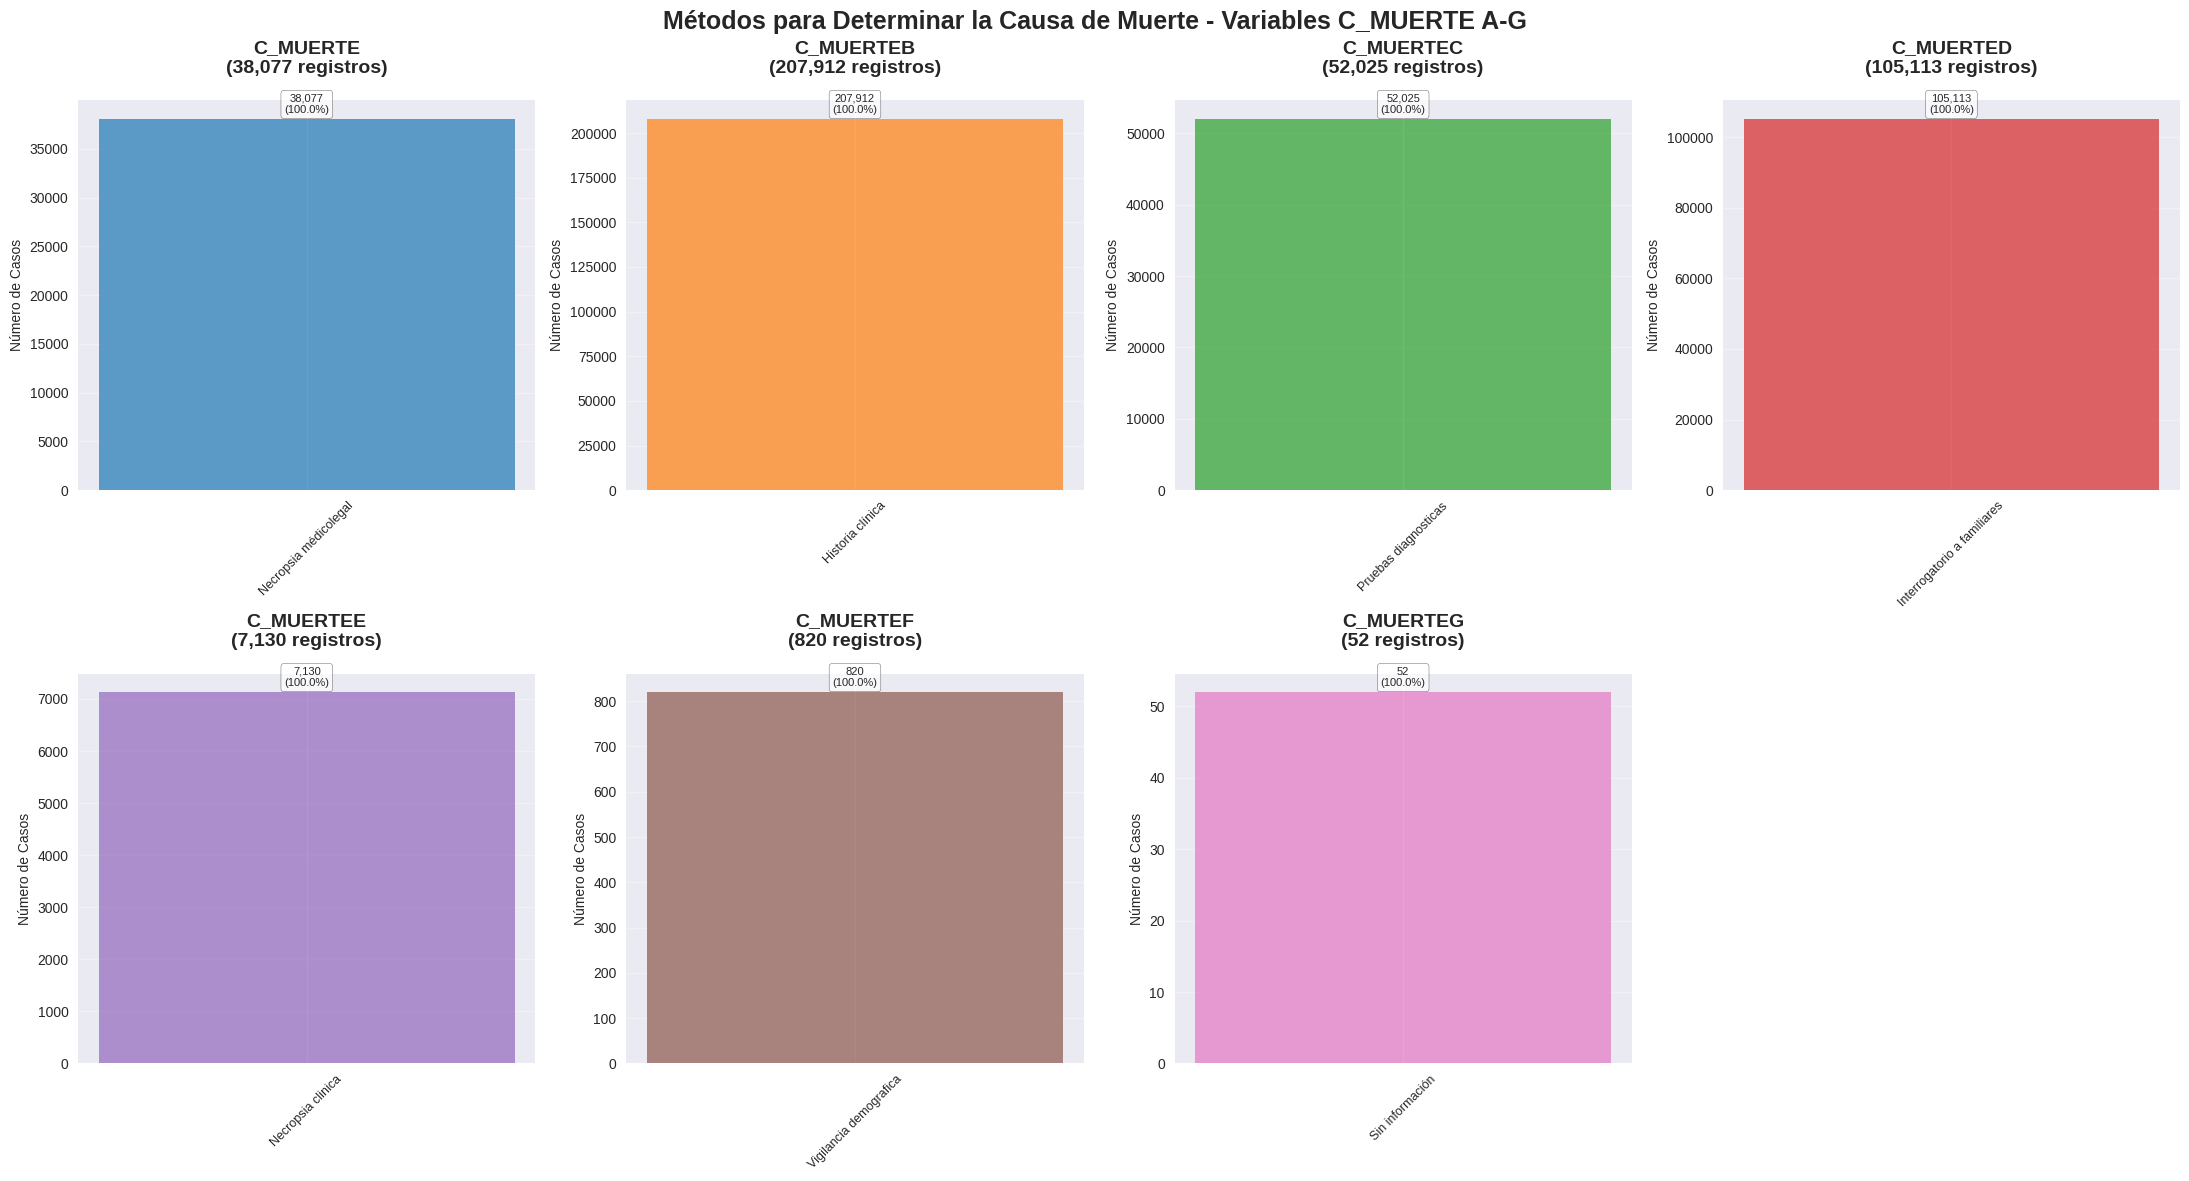

In [28]:
# Histograma para C_MUERTE A-G con los significados específicos
c_muerte_vars = ['C_MUERTE', 'C_MUERTEB', 'C_MUERTEC', 'C_MUERTED',
                'C_MUERTEE', 'C_MUERTEF', 'C_MUERTEG']

# Diccionario completo con todos los significados específicos
c_muerte_map_completo = {
    1: {
        'C_MUERTE': 'Necropsia médicolegal',
        'C_MUERTEB': 'Historia clínica',
        'C_MUERTEC': 'Pruebas diagnosticas',
        'C_MUERTED': 'Interrogatorio a familiares',
        'C_MUERTEE': 'Necropsia clinica',
        'C_MUERTEF': 'Vigilancia demografica',
        'C_MUERTEG': 'Sin información'
    },
    0: 'No aplica',
    2: 'Otro método no especificado',
    9: 'No especificado'
}

# Crear el gráfico principal
fig, axes = plt.subplots(2, 4, figsize=(22, 12))
axes = axes.flatten()

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

for i, var in enumerate(c_muerte_vars):
    if i < len(axes):
        # Obtener datos de la variable
        var_data = df[var].dropna()
        total_registros = len(var_data)

        if total_registros > 0:
            # Contar valores
            counts = var_data.value_counts().sort_index()

            # Crear etiquetas específicas para cada variable
            labels = []
            for code in counts.index:
                if code == 1:
                    labels.append(c_muerte_map_completo[1][var])
                else:
                    labels.append(f"{code}: {c_muerte_map_completo.get(code, 'Desconocido')}")

            # Crear gráfico de barras
            bars = axes[i].bar(range(len(counts)), counts.values,
                             color=colors[i % len(colors)], alpha=0.7)

            # Personalizar cada subplot
            axes[i].set_title(f'{var}\n({total_registros:,} registros)',
                            fontsize=14, fontweight='bold', pad=20)
            axes[i].set_ylabel('Número de Casos', fontsize=10)
            axes[i].tick_params(axis='x', rotation=45, labelsize=9)
            axes[i].set_xticks(range(len(counts)))
            axes[i].set_xticklabels(labels, fontsize=9)
            axes[i].grid(axis='y', alpha=0.3)

            # Añadir valores y porcentajes en las barras
            for j, (code, value) in enumerate(counts.items()):
                percentage = (value / total_registros) * 100
                axes[i].text(j, value + (value * 0.01),
                           f'{int(value):,}\n({percentage:.1f}%)',
                           ha='center', va='bottom', fontsize=8,
                           bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.7))

# Eliminar el subplot vacío si existe
if len(c_muerte_vars) < len(axes):
    for i in range(len(c_muerte_vars), len(axes)):
        fig.delaxes(axes[i])

plt.suptitle('Métodos para Determinar la Causa de Muerte - Variables C_MUERTE A-G',
             fontsize=18, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

In [29]:
# Tabla resumen de completitud y métodos principales
print("=" * 80)
print("RESUMEN EJECUTIVO - MÉTODOS PARA DETERMINAR CAUSA DE MUERTE")
print("=" * 80)

resumen_data = []

for var in c_muerte_vars:
    total_registros = len(df)
    registros_no_nulos = df[var].notna().sum()
    porcentaje_no_nulos = (registros_no_nulos / total_registros) * 100

    if registros_no_nulos > 0:
        # Contar método principal (código 1)
        metodo_principal_count = (df[var] == 1).sum()
        porcentaje_principal = (metodo_principal_count / registros_no_nulos) * 100

        metodo_principal_nombre = c_muerte_map_completo[1][var]
    else:
        metodo_principal_count = 0
        porcentaje_principal = 0
        metodo_principal_nombre = "N/A"

    resumen_data.append({
        'Variable': var,
        'Total Registros': total_registros,
        'Registros No Nulos': registros_no_nulos,
        '% No Nulos': porcentaje_no_nulos,
        'Método Principal': metodo_principal_nombre,
        'Count Método Principal': metodo_principal_count,
        '% Método Principal': porcentaje_principal
    })

# Crear DataFrame de resumen
df_resumen = pd.DataFrame(resumen_data)
print(df_resumen.to_string(index=False, formatters={
    'Total Registros': '{:,}'.format,
    'Registros No Nulos': '{:,}'.format,
    '% No Nulos': '{:.1f}%'.format,
    'Count Método Principal': '{:,}'.format,
    '% Método Principal': '{:.1f}%'.format
}))

print("\n" + "=" * 80)

RESUMEN EJECUTIVO - MÉTODOS PARA DETERMINAR CAUSA DE MUERTE
 Variable Total Registros Registros No Nulos % No Nulos            Método Principal Count Método Principal % Método Principal
 C_MUERTE         275,676             38,077      13.8%       Necropsia médicolegal                 38,077             100.0%
C_MUERTEB         275,676            207,912      75.4%            Historia clínica                207,912             100.0%
C_MUERTEC         275,676             52,025      18.9%        Pruebas diagnosticas                 52,025             100.0%
C_MUERTED         275,676            105,113      38.1% Interrogatorio a familiares                105,113             100.0%
C_MUERTEE         275,676              7,130       2.6%           Necropsia clinica                  7,130             100.0%
C_MUERTEF         275,676                820       0.3%      Vigilancia demografica                    820             100.0%
C_MUERTEG         275,676                 52       0.0%   

<Figure size 1400x800 with 0 Axes>

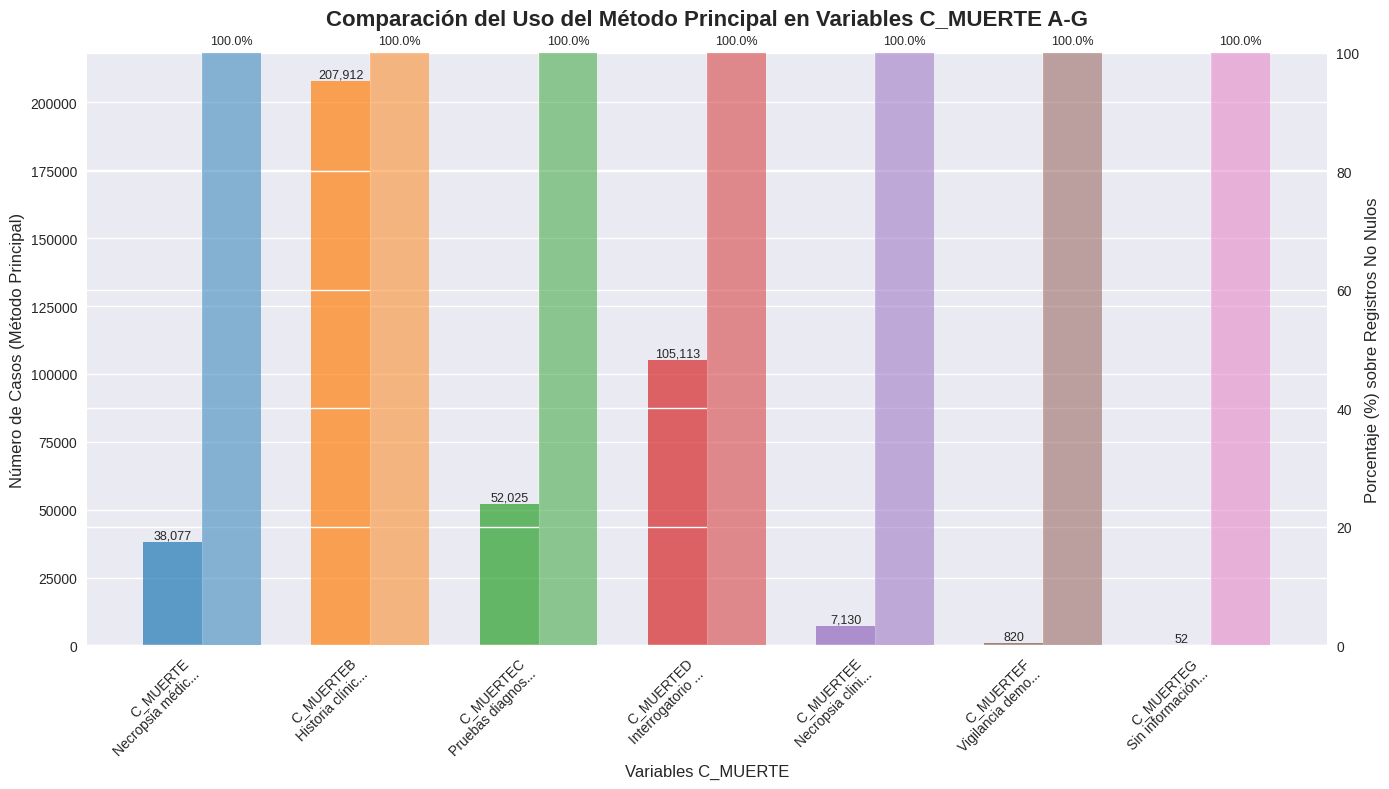

In [30]:
# Gráfico comparativo de uso de métodos principales
plt.figure(figsize=(14, 8))

# Preparar datos para el gráfico comparativo
variables = []
counts_principal = []
porcentajes = []
colores = []

for i, var in enumerate(c_muerte_vars):
    variables.append(var)
    if df[var].notna().sum() > 0:
        count_principal = (df[var] == 1).sum()
        total_var = df[var].notna().sum()
        porcentaje = (count_principal / total_var) * 100
    else:
        count_principal = 0
        porcentaje = 0

    counts_principal.append(count_principal)
    porcentajes.append(porcentaje)
    colores.append(colors[i % len(colors)])

# Crear gráfico de barras doble
x_pos = np.arange(len(variables))
width = 0.35

fig, ax1 = plt.subplots(figsize=(14, 8))

# Barras para conteos
bars1 = ax1.bar(x_pos - width/2, counts_principal, width,
                color=colores, alpha=0.7, label='Casos (Método Principal)')
ax1.set_ylabel('Número de Casos (Método Principal)', fontsize=12)
ax1.tick_params(axis='y')

# Segundo eje para porcentajes
ax2 = ax1.twinx()
bars2 = ax2.bar(x_pos + width/2, porcentajes, width,
                color=colores, alpha=0.5, label='% sobre No Nulos')
ax2.set_ylabel('Porcentaje (%) sobre Registros No Nulos', fontsize=12)
ax2.set_ylim(0, 100)

# Personalizar
ax1.set_xlabel('Variables C_MUERTE', fontsize=12)
ax1.set_xticks(x_pos)
ax1.set_xticklabels([f'{var}\n{c_muerte_map_completo[1][var][:15]}...'
                    for var in variables], rotation=45, ha='right')

# Añadir valores en las barras
for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    height1 = bar1.get_height()
    height2 = bar2.get_height()
    ax1.text(bar1.get_x() + bar1.get_width()/2., height1 + 100,
            f'{int(height1):,}', ha='center', va='bottom', fontsize=9)
    ax2.text(bar2.get_x() + bar2.get_width()/2., height2 + 1,
            f'{height2:.1f}%', ha='center', va='bottom', fontsize=9)

plt.title('Comparación del Uso del Método Principal en Variables C_MUERTE A-G',
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

ANÁLISIS DE PATRONES ENTRE VARIABLES C_MUERTE:

1. SOLAPAMIENTO ENTRE MÉTODOS PRINCIPALES:
C_MUERTE y C_MUERTEB: 126 casos usan ambos métodos
C_MUERTE y C_MUERTEC: 43 casos usan ambos métodos
C_MUERTE y C_MUERTED: 90 casos usan ambos métodos
C_MUERTE y C_MUERTEE: 56 casos usan ambos métodos
C_MUERTE y C_MUERTEF: 2 casos usan ambos métodos
C_MUERTEB y C_MUERTEC: 50,970 casos usan ambos métodos
C_MUERTEB y C_MUERTED: 79,751 casos usan ambos métodos
C_MUERTEB y C_MUERTEE: 3,022 casos usan ambos métodos
C_MUERTEB y C_MUERTEF: 725 casos usan ambos métodos
C_MUERTEC y C_MUERTED: 25,888 casos usan ambos métodos
C_MUERTEC y C_MUERTEE: 821 casos usan ambos métodos
C_MUERTEC y C_MUERTEF: 534 casos usan ambos métodos
C_MUERTED y C_MUERTEE: 1,762 casos usan ambos métodos
C_MUERTED y C_MUERTEF: 683 casos usan ambos métodos
C_MUERTEE y C_MUERTEF: 29 casos usan ambos métodos

2. CASOS CON MÚLTIPLES MÉTODOS PRINCIPALES:
Casos con 1 método: 168,386
Casos con 2 métodos: 79,990
Casos con 3 métodos: 26,45

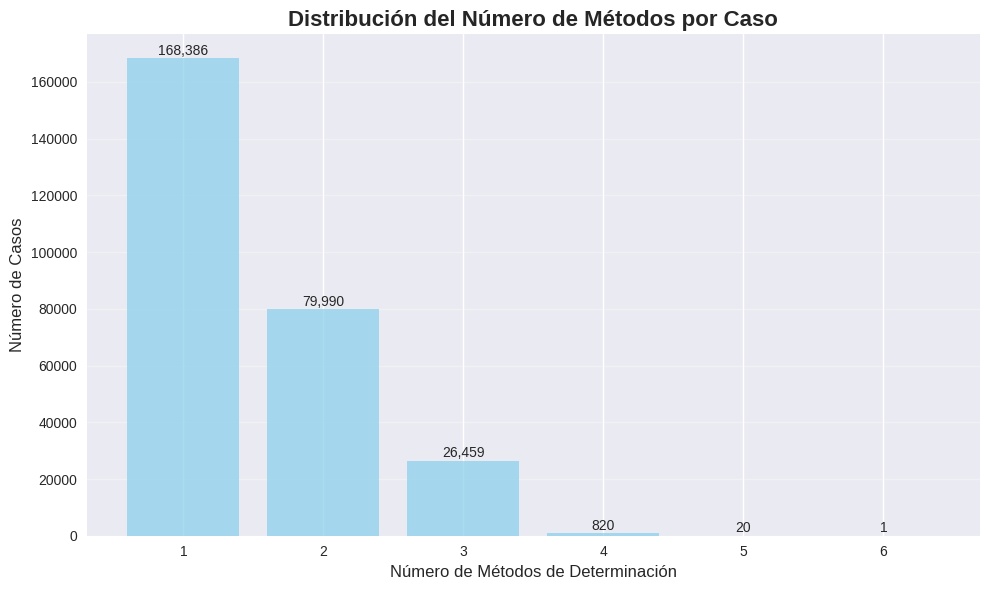

In [32]:
# Análisis de patrones entre variables - CORREGIDO
print("ANÁLISIS DE PATRONES ENTRE VARIABLES C_MUERTE:")
print("=" * 50)

# Verificar solapamiento entre variables
print("\n1. SOLAPAMIENTO ENTRE MÉTODOS PRINCIPALES:")
for i, var1 in enumerate(c_muerte_vars):
    for j, var2 in enumerate(c_muerte_vars):
        if i < j:  # Evitar duplicados y auto-comparación
            count_both = ((df[var1] == 1) & (df[var2] == 1)).sum()
            if count_both > 0:
                print(f"{var1} y {var2}: {count_both:,} casos usan ambos métodos")

# Casos que tienen múltiples métodos - CORREGIDO
print(f"\n2. CASOS CON MÚLTIPLES MÉTODOS PRINCIPALES:")

# Calcular el número de métodos principales por caso
metodos_por_caso = (df[c_muerte_vars] == 1).sum(axis=1)

# Contar casos con múltiples métodos
casos_un_metodo = (metodos_por_caso == 1).sum()
casos_dos_metodos = (metodos_por_caso == 2).sum()
casos_tres_metodos = (metodos_por_caso == 3).sum()
casos_cuatro_metodos = (metodos_por_caso == 4).sum()
casos_cinco_metodos = (metodos_por_caso >= 5).sum()

total_casos_con_metodos = (metodos_por_caso >= 1).sum()

print(f"Casos con 1 método: {casos_un_metodo:,}")
print(f"Casos con 2 métodos: {casos_dos_metodos:,}")
print(f"Casos con 3 métodos: {casos_tres_metodos:,}")
print(f"Casos con 4 métodos: {casos_cuatro_metodos:,}")
print(f"Casos con 5+ métodos: {casos_cinco_metodos:,}")
print(f"Total casos con al menos 1 método: {total_casos_con_metodos:,}")

# Distribución del número de métodos por caso
print(f"\n3. DISTRIBUCIÓN DETALLADA DE MÉTODOS POR CASO:")
distribucion_metodos = metodos_por_caso.value_counts().sort_index()
for num_metodos, count in distribucion_metodos.items():
    if num_metodos >= 1:
        porcentaje = (count / total_casos_con_metodos) * 100
        print(f"{num_metodos} método(s): {count:,} casos ({porcentaje:.1f}%)")

# Gráfico de la distribución de métodos por caso
plt.figure(figsize=(10, 6))
distribucion_metodos_positivos = distribucion_metodos[distribucion_metodos.index >= 1]
bars = plt.bar(distribucion_metodos_positivos.index, distribucion_metodos_positivos.values,
               color='skyblue', alpha=0.7)

plt.title('Distribución del Número de Métodos por Caso', fontsize=16, fontweight='bold')
plt.xlabel('Número de Métodos de Determinación', fontsize=12)
plt.ylabel('Número de Casos', fontsize=12)
plt.xticks(distribucion_metodos_positivos.index)
plt.grid(axis='y', alpha=0.3)

# Añadir valores en las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 100,
            f'{int(height):,}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [34]:
# Diccionario completo de causas CAU_HOMOL
causas_homol_dict = {
    1: 'Enfermedades infecciosas intestinales',
    2: 'Tuberculosis y secuelas',
    3: 'Ciertas enfermedades transmitidas por vectores y rabia',
    4: 'Ciertas enfermedades inmunoprevenibles',
    5: 'Septicemia, excepto neonatal',
    6: 'Todas las demás enfermedades bacterianas',
    7: 'Sífilis y otras enfermedades venéreas',
    8: 'Hepatitis viral y secuelas',
    9: 'Enfermedad por el VIH (SIDA)',
    10: 'Todas las demás enfermedades infecciosas y parasitarias',
    11: 'Tumores malignos del labio, de la cavidad bucal y de la faringe',
    12: 'Tumor maligno del esófago',
    13: 'Tumor maligno del estómago',
    14: 'Tumor maligno del colon, de la unión rectosigmoidea, recto y ano',
    15: 'Tumor maligno del hígado',
    16: 'Tumor maligno de la vesícula biliar y de las vías biliares',
    17: 'Tumor maligno del páncreas',
    18: 'Todos los demás tumores malignos de los órganos digestivos y del peritoneo',
    19: 'Tumor maligno de la laringe',
    20: 'Tumor maligno de la tráquea, los bronquios y el pulmón',
    21: 'Todos los demás tumores malignos de los órganos respiratorios e intratorácicos, excepto tráquea, bronquios y pulmón',
    22: 'Tumor maligno de los huesos y de los cartilagos articulares',
    23: 'Melanoma y otros tumores malignos de la piel',
    24: 'Tumor maligno de la mama de la mujer',
    25: 'Tumor maligno del cuello del útero',
    26: 'Tumor maligno de otras partes del útero',
    27: 'Tumor maligno del ovario',
    28: 'Tumor maligno de la próstata',
    29: 'Tumor maligno de la vejiga urinaria',
    30: 'Todos los demás tumores malignos de los órganos urinarios',
    31: 'Tumor maligno del encéfalo, del ojo y de otras partes del sistema nervioso central',
    32: 'Tumor maligno del tiroides y de otras glandulas endocrinas',
    33: 'Tumores malignos de sitios mal definidos y secundarios',
    34: 'Tumor maligno de sitios no especificados',
    35: 'Leucemia',
    36: 'Todos los demás tumores malignos del tejido linfático, de los órganos hematopoyéticos y de tejidos afines',
    37: 'Tumores: in situ, benignos y de comportamiento incierto o desconocido y los no específicados',
    38: 'Todos los demás tumores malignos de otras localizaciones',
    39: 'Anemias: nutricionales, hemolíticas, aplásticas y otras',
    40: 'Defectos de coagulación, púrpura y otras afecciones hemorrágicas y de la sangre y los trastornos que afectan la inmunidad',
    41: 'Diabetes mellitus',
    42: 'Deficiencias nutricionales',
    43: 'Todas las demás enfermedades endocrinas y nutricionales',
    44: 'Trastornos mentales y del comportamiento',
    45: 'Meningitis y otras enfermedades inflamatorias del sistema nervioso central',
    46: 'Epilepsia y otros trastornos episodicos y paroxisticos',
    47: 'Todas las demás enfermedades del sistema nervioso',
    48: 'Enfermedades del ojo y sus anexos, del oído y de la apófisis mastoides',
    49: 'Fiebre reumática aguda y enfermedades cardíacas reumáticas crónicas',
    50: 'Enfermedades hipertensivas',
    51: 'Enfermedades isquémicas del corazón',
    52: 'Enfermedad cardiopulmonar y enfermedades de la circulación pulmonar',
    53: 'Todas las demás formas de enfermedad del corazón',
    54: 'Insuficiencia cardíaca',
    55: 'Enfermedades cerebrovasculares',
    56: 'Aterosclerosis',
    57: 'Aneurisma aortico',
    58: 'Enfermedades de los vasos sanguíneos y otras enfermedades del sistema circulatorio',
    59: 'Neumonía',
    60: 'Enfermedades crónicas de las vías respiratorias inferiores',
    61: 'Enfermedades del pulmón debidas a agentes externos',
    62: 'Todas las demás enfermedades del sistema respiratorio',
    63: 'Ulcera',
    64: 'Enfermedades del esófago y otras enfermedades del estómago y duodeno',
    65: 'Enfermedades del apéndice, hernia y obstrucción intestinal',
    66: 'Enfermedades del hígado',
    67: 'Trastornos de la vesícula biliar, de las vías biliares y del páncreas',
    68: 'Enteritis, colitis no infecciosa y otras enfermedades de los intestinos',
    69: 'Enfermedades del peritoneo y todas las demás enfermedades del sistema digestivo',
    70: 'Hemorragia gastrointestinal',
    71: 'Enfermedades de la piel y del tejido subcutáneo',
    72: 'Enfermedades del sistema osteomuscular y del tejido conjuntivo',
    73: 'Enfermedades glomerulares y tubulointersticiales',
    74: 'Insuficiencia renal',
    75: 'Todas las demás enfermedades del sistema urinario',
    76: 'Hiperplasia de la próstata',
    77: 'Trastornos de los organos genitales',
    78: 'Embarazo, parto y puerperio',
    79: 'Feto y recién nacido afectados por ciertas afecciones maternas',
    80: 'Feto y recién nacido afectados por complicaciones obstétricas y traumatismo del nacimiento',
    81: 'Retardo del crecimiento fetal, desnutrición fetal, gestación corta y bajo peso al nacer',
    82: 'Trastornos respiratorios específicos del período perinatal',
    83: 'Trastornos hemorragicos y hematologicos del feto y del recien nacido',
    84: 'Infecciones específicas del período perinatal',
    85: 'Enterocolitis necrotizante del feto y del recién nacido',
    86: 'Todas las demás afecciones originadas en el período perinatal',
    87: 'Malformaciones congénitas del sistema circulatorio',
    88: 'Las demás malformaciones congénitas, deformidades y anomalias congénitas',
    89: 'Signos, síntomas y afecciones mal definidas',
    90: 'Accidentes de transporte de motor y secuelas',
    91: 'Otros accidentes de transporte terrestre',
    92: 'Los demás accidentes de transporte y los no especificados y secuelas',
    93: 'Caídas',
    94: 'Accidentes por disparo de arma de fuego',
    95: 'Ahogamiento y sumersión accidentales',
    96: 'Otros accidentes que obstruyen la respiración',
    97: 'Exposición a la corriente eléctrica, radiación y temperatura y presión del aire ambientales extremas',
    98: 'Exposición al humo, fuego y llamas',
    99: 'Envenenamiento accidental por, y exposición a sustancias nocivas',
    100: 'Lesiones autoinfligidas intencionalmente (suicidios) y secuelas',
    101: 'Agresiones (homicidios) y secuelas',
    102: 'Eventos de intención no determinada y secuelas',
    103: 'Intervención legal y operaciones de guerra y secuelas',
    104: 'Contratiempos de la atención médico quirúrgica y secuelas',
    105: 'Otros accidentes y secuelas'
}

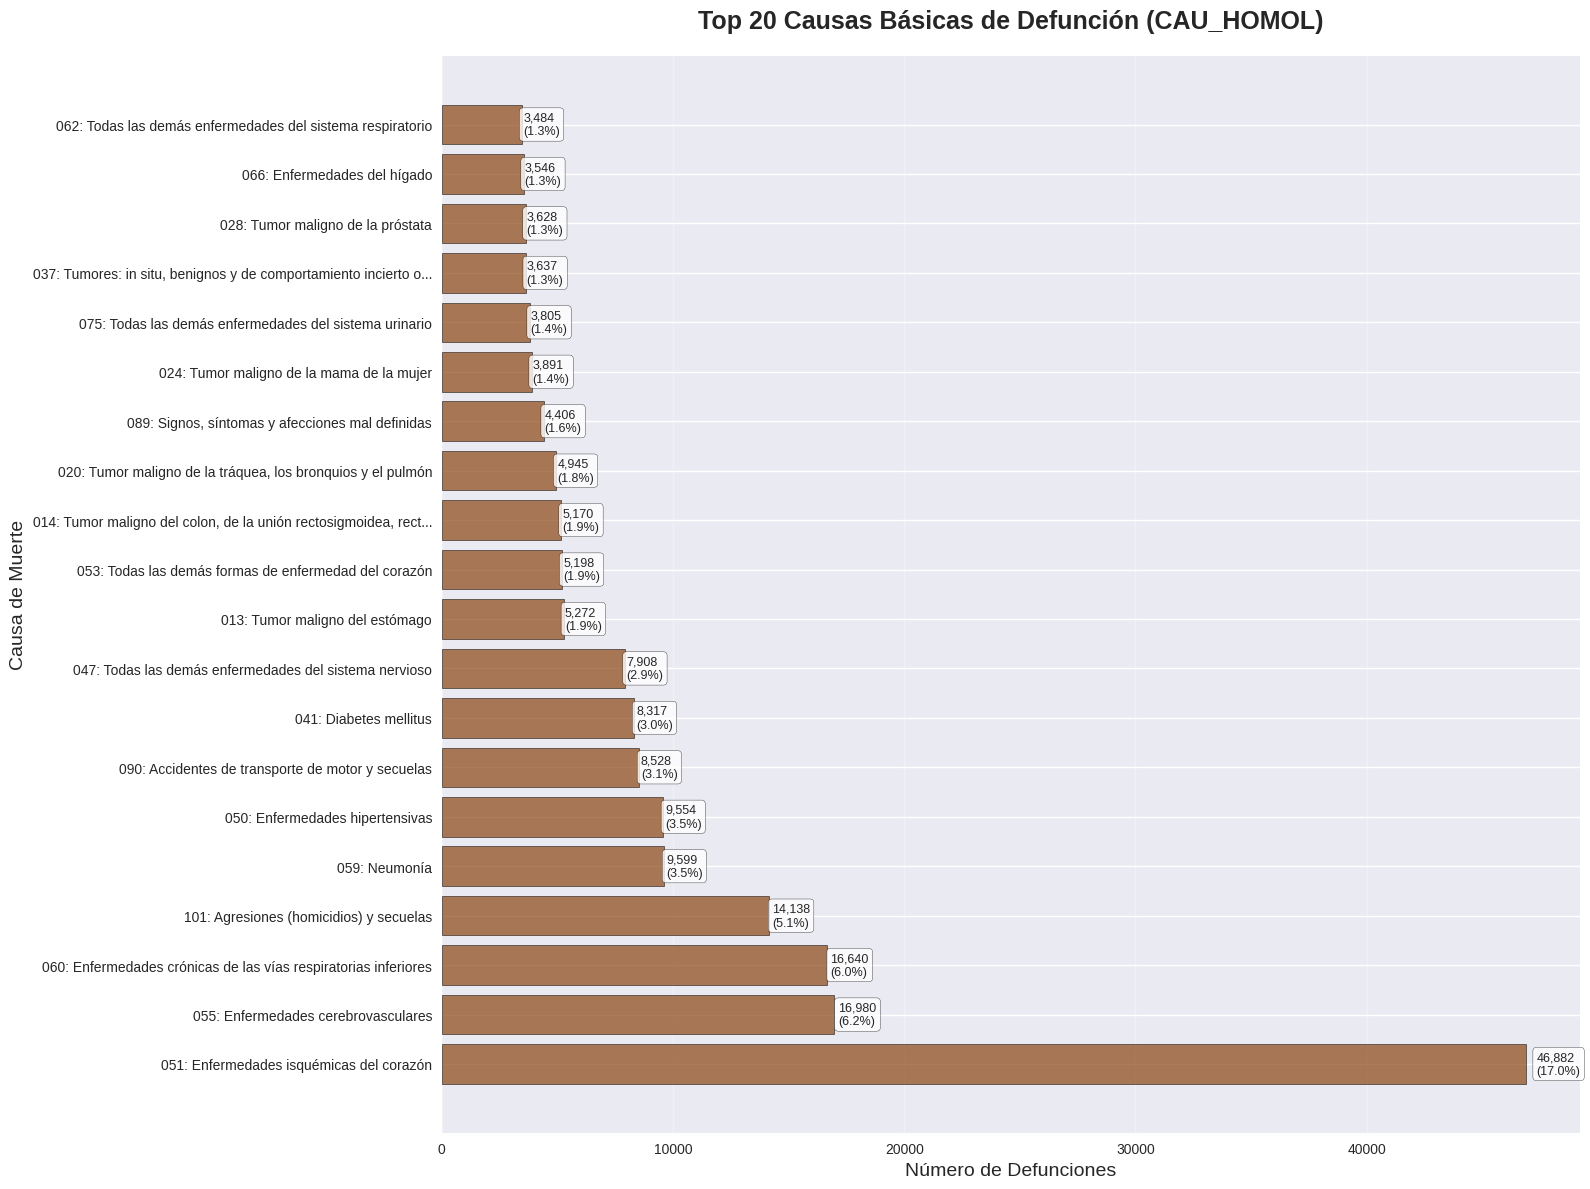

In [35]:
# Histograma 7: CAU_HOMOL - Top 20 causas básicas agrupadas CON DESCRIPCIONES
plt.figure(figsize=(16, 12))

# Obtener top 20 causas
top_20_causas = df['CAU_HOMOL'].value_counts().head(20)

# Crear etiquetas con código y descripción
labels = []
for codigo in top_20_causas.index:
    descripcion = causas_homol_dict.get(codigo, f'Código {codigo} (Desconocido)')
    # Acortar descripciones muy largas para mejor visualización
    if len(descripcion) > 60:
        descripcion = descripcion[:57] + "..."
    labels.append(f"{codigo:03d}: {descripcion}")

bars = plt.barh(range(len(top_20_causas)), top_20_causas.values,
                color='#8B4513', alpha=0.7, edgecolor='black', linewidth=0.5)
plt.title('Top 20 Causas Básicas de Defunción (CAU_HOMOL)', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Número de Defunciones', fontsize=14)
plt.ylabel('Causa de Muerte', fontsize=14)
plt.yticks(range(len(top_20_causas)), labels, fontsize=10)
plt.grid(axis='x', alpha=0.3)

# Añadir valores en las barras
for i, bar in enumerate(bars):
    width = bar.get_width()
    percentage = (width / len(df)) * 100
    plt.text(width + (width * 0.01), bar.get_y() + bar.get_height()/2.,
            f'{int(width):,}\n({percentage:.1f}%)',
            ha='left', va='center', fontsize=9,
            bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.tight_layout()
plt.show()

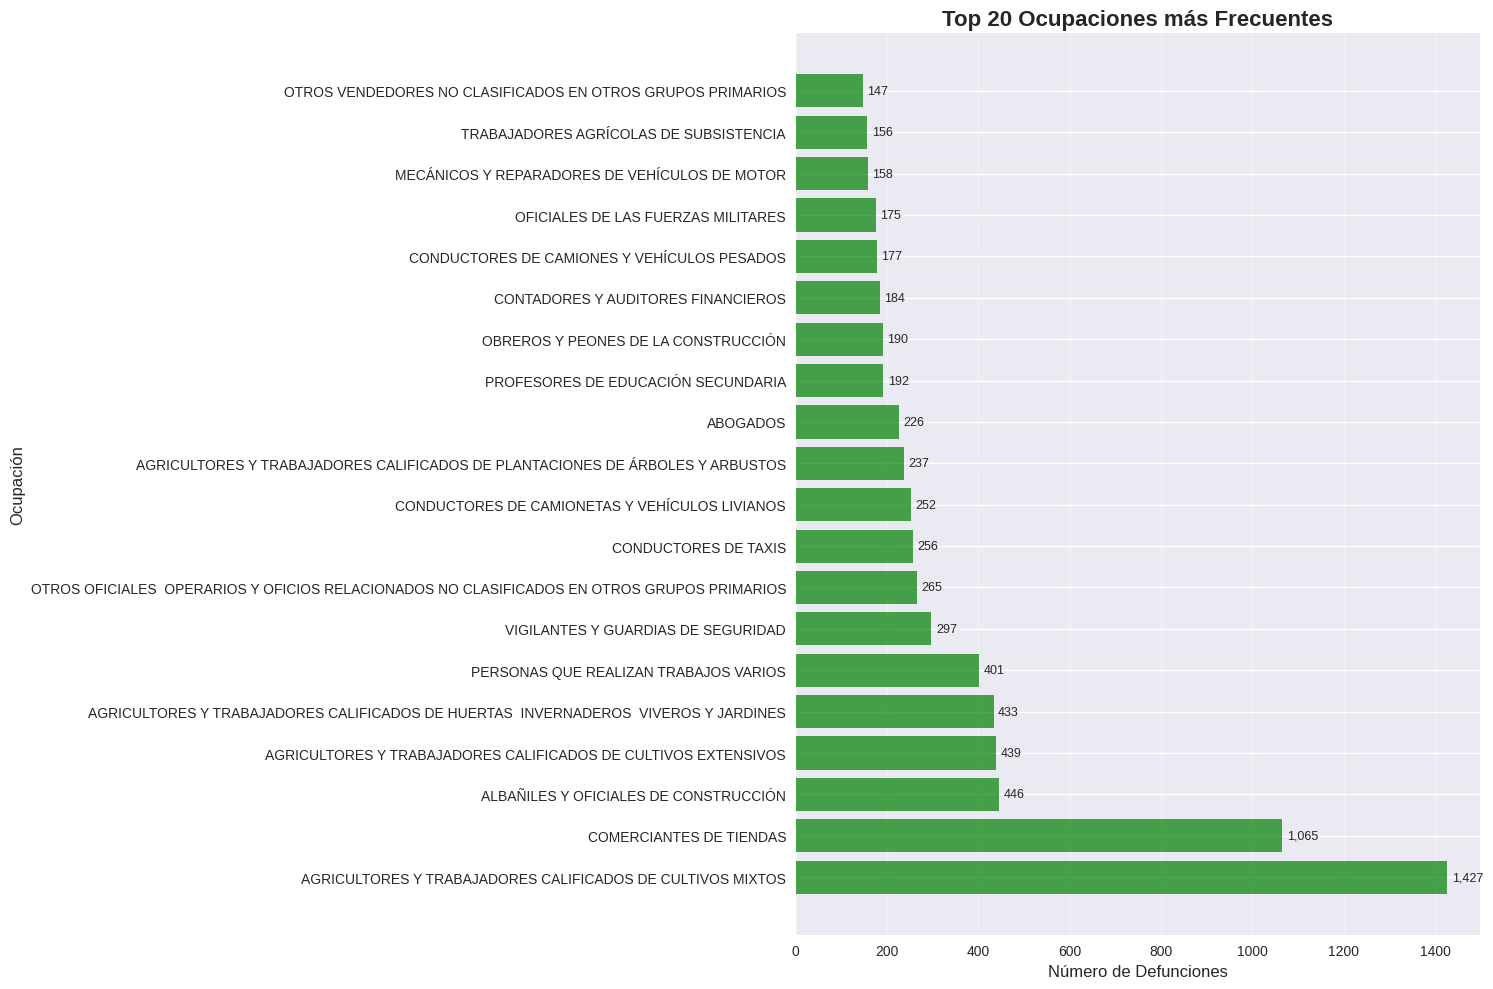

Total de ocupaciones únicas: 385
Registros con ocupación especificada: 13,481 (4.9%)


In [26]:
# Histograma 8: OCUPACION - Top 20 ocupaciones
plt.figure(figsize=(15, 10))

# Filtrar valores no nulos y obtener top 20
ocupacion_counts = df['OCUPACION'].value_counts().head(20)

bars = plt.barh(range(len(ocupacion_counts)), ocupacion_counts.values, color='green', alpha=0.7)
plt.title('Top 20 Ocupaciones más Frecuentes', fontsize=16, fontweight='bold')
plt.xlabel('Número de Defunciones', fontsize=12)
plt.ylabel('Ocupación', fontsize=12)
plt.yticks(range(len(ocupacion_counts)), ocupacion_counts.index)

# Añadir valores en las barras
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height()/2.,
            f'{int(width):,}', ha='left', va='center', fontsize=9)

plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Total de ocupaciones únicas: {df['OCUPACION'].nunique()}")
print(f"Registros con ocupación especificada: {df['OCUPACION'].notna().sum():,} ({df['OCUPACION'].notna().sum()/len(df)*100:.1f}%)")

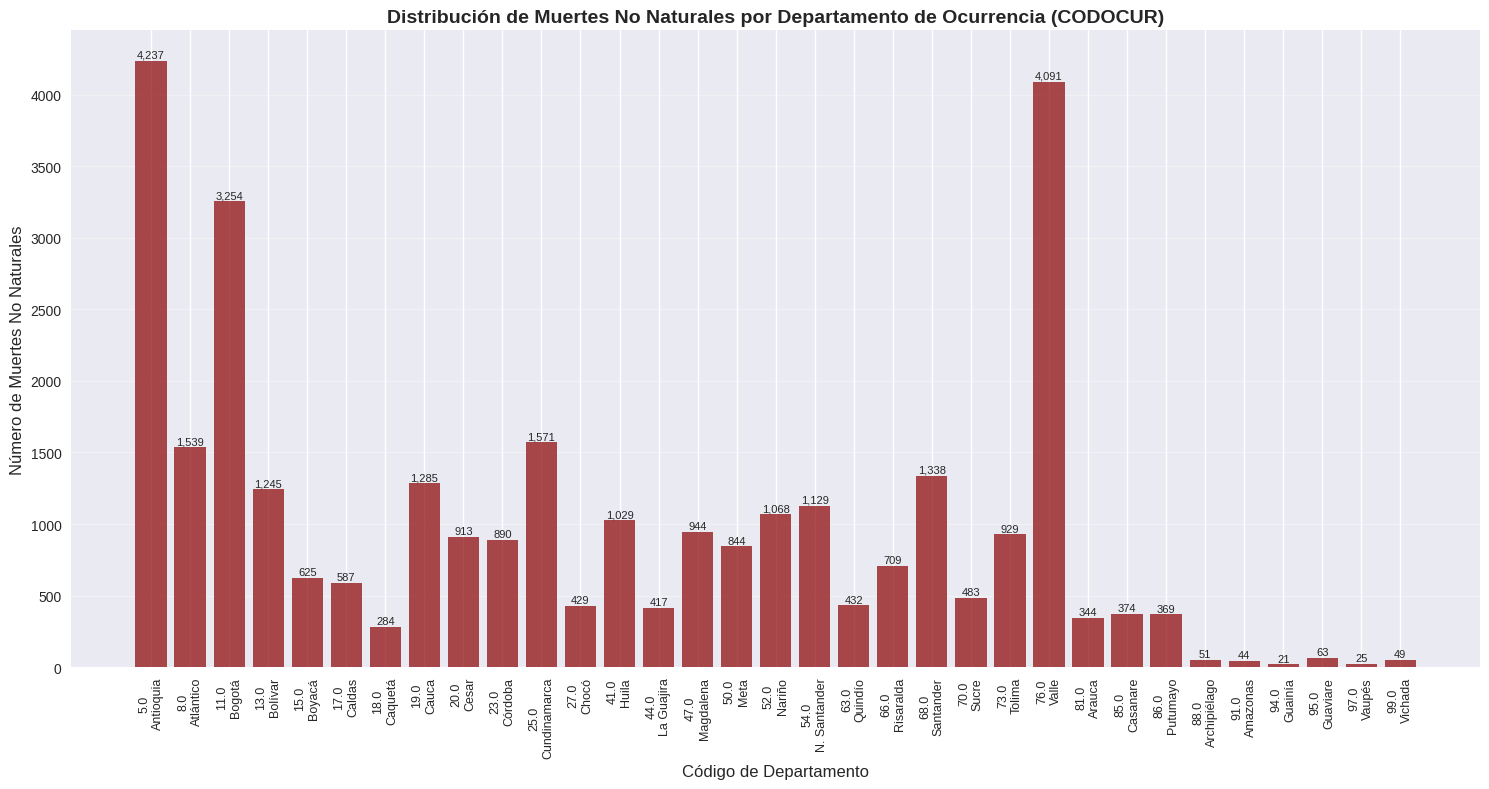

Total de muertes no naturales registradas: 31,612
Porcentaje sobre total: 11.5%


In [27]:
# Histograma 9: CODOCUR - Departamento de ocurrencia (muertes no naturales)
plt.figure(figsize=(15, 8))

# Filtrar valores no nulos
codocur_counts = df['CODOCUR'].value_counts().sort_index()

# Usar el mismo mapeo de departamentos
labels = [f"{code}\n{depto_names.get(code, '')}" for code in codocur_counts.index]

bars = plt.bar(range(len(codocur_counts)), codocur_counts.values, color='darkred', alpha=0.7)
plt.title('Distribución de Muertes No Naturales por Departamento de Ocurrencia (CODOCUR)', fontsize=14, fontweight='bold')
plt.xlabel('Código de Departamento', fontsize=12)
plt.ylabel('Número de Muertes No Naturales', fontsize=12)
plt.xticks(range(len(codocur_counts)), labels, rotation=90, fontsize=9)
plt.grid(axis='y', alpha=0.3)

# Añadir valores en las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
            f'{int(height):,}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

print(f"Total de muertes no naturales registradas: {df['CODOCUR'].notna().sum():,}")
print(f"Porcentaje sobre total: {df['CODOCUR'].notna().sum()/len(df)*100:.1f}%")

In [37]:
import pandas as pd
import numpy as np
from itertools import combinations
from scipy.stats import chi2_contingency
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Definir las variables objetivo específicas
target_vars = [
    "GRU_ED1", "SEXO", "COD_DPTO", "MES", "SEG_SOCIAL", "P_PMAN_IRIS",
    "C_MUERTE", "C_MUERTEB", "C_MUERTEC", "C_MUERTED", "C_MUERTEE", "C_MUERTEF", "C_MUERTEG",
    "CAU_HOMOL", "OCUPACION", "CODOCUR"
]

df_work = df.copy()

# Verificar qué variables están presentes en el DataFrame
presentes = [c for c in target_vars if c in df_work.columns]
print(f"Variables encontradas en el DataFrame: {presentes}")
print(f"Variables no encontradas: {set(target_vars) - set(presentes)}")

if len(presentes) == 0:
    raise ValueError("Ninguna de las variables objetivo está en el DataFrame.")

# Transformaciones necesarias para χ²
print("\nRealizando transformaciones para análisis de chi-cuadrado...")

# 1) GRU_ED1 -> ya es categórica, pero asegurar tipo string
if "GRU_ED1" in presentes:
    df_work["GRU_ED1"] = df_work["GRU_ED1"].astype("string")

# 2) SEXO -> convertir a categorías con nombre
if "SEXO" in presentes:
    sexo_map = {1: 'Masculino', 2: 'Femenino', 9: 'No especificado'}
    df_work["SEXO"] = df_work["SEXO"].map(sexo_map).astype("string")

# 3) COD_DPTO -> mantener como string (códigos de departamento)
if "COD_DPTO" in presentes:
    df_work["COD_DPTO"] = df_work["COD_DPTO"].astype("string")

# 4) MES -> convertir a nombres de meses
if "MES" in presentes:
    mes_map = {
        1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 5: 'Mayo', 6: 'Junio',
        7: 'Julio', 8: 'Agosto', 9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'
    }
    df_work["MES"] = df_work["MES"].map(mes_map).astype("string")

# 5) SEG_SOCIAL -> convertir a categorías con nombre
if "SEG_SOCIAL" in presentes:
    seguridad_map = {
        1: 'Contributivo', 2: 'Subsidiado', 3: 'Excepción',
        4: 'Especial', 5: 'No asegurado', 9: 'No especificado'
    }
    df_work["SEG_SOCIAL"] = df_work["SEG_SOCIAL"].map(seguridad_map).astype("string")

# 6) P_PMAN_IRIS -> convertir a categorías con nombre
if "P_PMAN_IRIS" in presentes:
    manera_muerte_map = {
        1: 'Natural', 2: 'Accidente', 3: 'Suicidio',
        4: 'Homicidio', 5: 'Violencia interpersonal',
        6: 'Intervención legal', 7: 'Evento de intención no determinada',
        9: 'No especificado'
    }
    df_work["P_PMAN_IRIS"] = df_work["P_PMAN_IRIS"].map(manera_muerte_map).astype("string")

# 7) Variables C_MUERTE A-G -> convertir a categorías con nombre
c_muerte_vars = ['C_MUERTE', 'C_MUERTEB', 'C_MUERTEC', 'C_MUERTED',
                'C_MUERTEE', 'C_MUERTEF', 'C_MUERTEG']

c_muerte_map_completo = {
    1: {
        'C_MUERTE': 'Necropsia médicolegal',
        'C_MUERTEB': 'Historia clínica',
        'C_MUERTEC': 'Pruebas diagnosticas',
        'C_MUERTED': 'Interrogatorio a familiares',
        'C_MUERTEE': 'Necropsia clinica',
        'C_MUERTEF': 'Vigilancia demografica',
        'C_MUERTEG': 'Sin información'
    },
    0: 'No aplica',
    2: 'Otro método',
    9: 'No especificado'
}

for var in c_muerte_vars:
    if var in presentes:
        def mapper(x):
            if pd.isna(x):
                return np.nan
            code = int(x) if not pd.isna(x) else x
            if code == 1:
                return c_muerte_map_completo[1][var]
            else:
                return c_muerte_map_completo.get(code, f'Código {code}')

        df_work[var] = df_work[var].apply(mapper).astype("string")

# 8) CAU_HOMOL -> mantener como string (códigos de causa)
if "CAU_HOMOL" in presentes:
    df_work["CAU_HOMOL"] = df_work["CAU_HOMOL"].astype("string")

# 9) OCUPACION -> ya es string, pero asegurar tipo
if "OCUPACION" in presentes:
    df_work["OCUPACION"] = df_work["OCUPACION"].astype("string")

# 10) CODOCUR -> mantener como string (códigos de departamento)
if "CODOCUR" in presentes:
    df_work["CODOCUR"] = df_work["CODOCUR"].astype("string")

# Verificar valores nulos después de las transformaciones
print("\nValores nulos por variable después de transformaciones:")
for var in presentes:
    nulos = df_work[var].isnull().sum()
    total = len(df_work)
    print(f"{var}: {nulos:,} nulos ({nulos/total*100:.1f}%)")

# ========= FUNCIONES AUXILIARES =========
def cramers_v(chi2, n, k_rows, k_cols):
    k = min(k_rows - 1, k_cols - 1)
    if k <= 0 or n <= 0:
        return np.nan
    return math.sqrt(chi2 / (n * k))

def contingency_c(chi2, n):
    if n <= 0:
        return np.nan
    return math.sqrt(chi2 / (chi2 + n))

def phi_coef(chi2, n, k_rows, k_cols):
    if k_rows == 2 and k_cols == 2 and n > 0:
        return math.sqrt(chi2 / n)
    return np.nan

# ========= CHI² Y COEFICIENTES PAR-A-PAR =========
print(f"\nCalculando chi-cuadrado para {len(presentes)} variables...")
results = []

for a, b in combinations(presentes, 2):
    # Filtrar valores nulos
    sub = df_work[[a, b]].dropna()
    if sub.empty:
        continue

    # Crear tabla de contingencia
    ct = pd.crosstab(sub[a], sub[b])

    # Verificar que la tabla tenga al menos 2 filas y 2 columnas
    if ct.shape[0] < 2 or ct.shape[1] < 2:
        continue

    # Verificar que no sea una tabla de ceros
    if (ct.sum().sum() == 0):
        continue

    # Corrección de Yates solo para tablas 2x2
    use_yates = (ct.shape[0] == 2 and ct.shape[1] == 2)

    try:
        chi2, p, dof, expected = chi2_contingency(ct, correction=use_yates)
    except (ValueError, ZeroDivisionError) as e:
        continue

    n = ct.values.sum()
    v = cramers_v(chi2, n, ct.shape[0], ct.shape[1])
    c = contingency_c(chi2, n)
    phi = phi_coef(chi2, n, ct.shape[0], ct.shape[1])

    results.append({
        "var1": a,
        "var2": b,
        "n": int(n),
        "tabla_dim": f"{ct.shape[0]}x{ct.shape[1]}",
        "chi2": chi2,
        "gl": dof,
        "p_valor": p,
        "C_contingencia": c,
        "V_cramer": v,
        "Phi_2x2": phi
    })

# Crear DataFrame de resultados
tabla_coeficientes = pd.DataFrame(results).sort_values(["var1","var2"]).reset_index(drop=True)

print(f"\nSe calcularon {len(tabla_coeficientes)} pares de variables")

Variables encontradas en el DataFrame: ['GRU_ED1', 'SEXO', 'COD_DPTO', 'MES', 'SEG_SOCIAL', 'P_PMAN_IRIS', 'C_MUERTE', 'C_MUERTEB', 'C_MUERTEC', 'C_MUERTED', 'C_MUERTEE', 'C_MUERTEF', 'C_MUERTEG', 'CAU_HOMOL', 'OCUPACION', 'CODOCUR']
Variables no encontradas: set()

Realizando transformaciones para análisis de chi-cuadrado...

Valores nulos por variable después de transformaciones:
GRU_ED1: 0 nulos (0.0%)
SEXO: 54 nulos (0.0%)
COD_DPTO: 0 nulos (0.0%)
MES: 0 nulos (0.0%)
SEG_SOCIAL: 0 nulos (0.0%)
P_PMAN_IRIS: 240,246 nulos (87.1%)
C_MUERTE: 237,599 nulos (86.2%)
C_MUERTEB: 67,764 nulos (24.6%)
C_MUERTEC: 223,651 nulos (81.1%)
C_MUERTED: 170,563 nulos (61.9%)
C_MUERTEE: 268,546 nulos (97.4%)
C_MUERTEF: 274,856 nulos (99.7%)
C_MUERTEG: 275,624 nulos (100.0%)
CAU_HOMOL: 0 nulos (0.0%)
OCUPACION: 262,195 nulos (95.1%)
CODOCUR: 244,064 nulos (88.5%)

Calculando chi-cuadrado para 16 variables...

Se calcularon 36 pares de variables


Creando matriz de correlaciones...


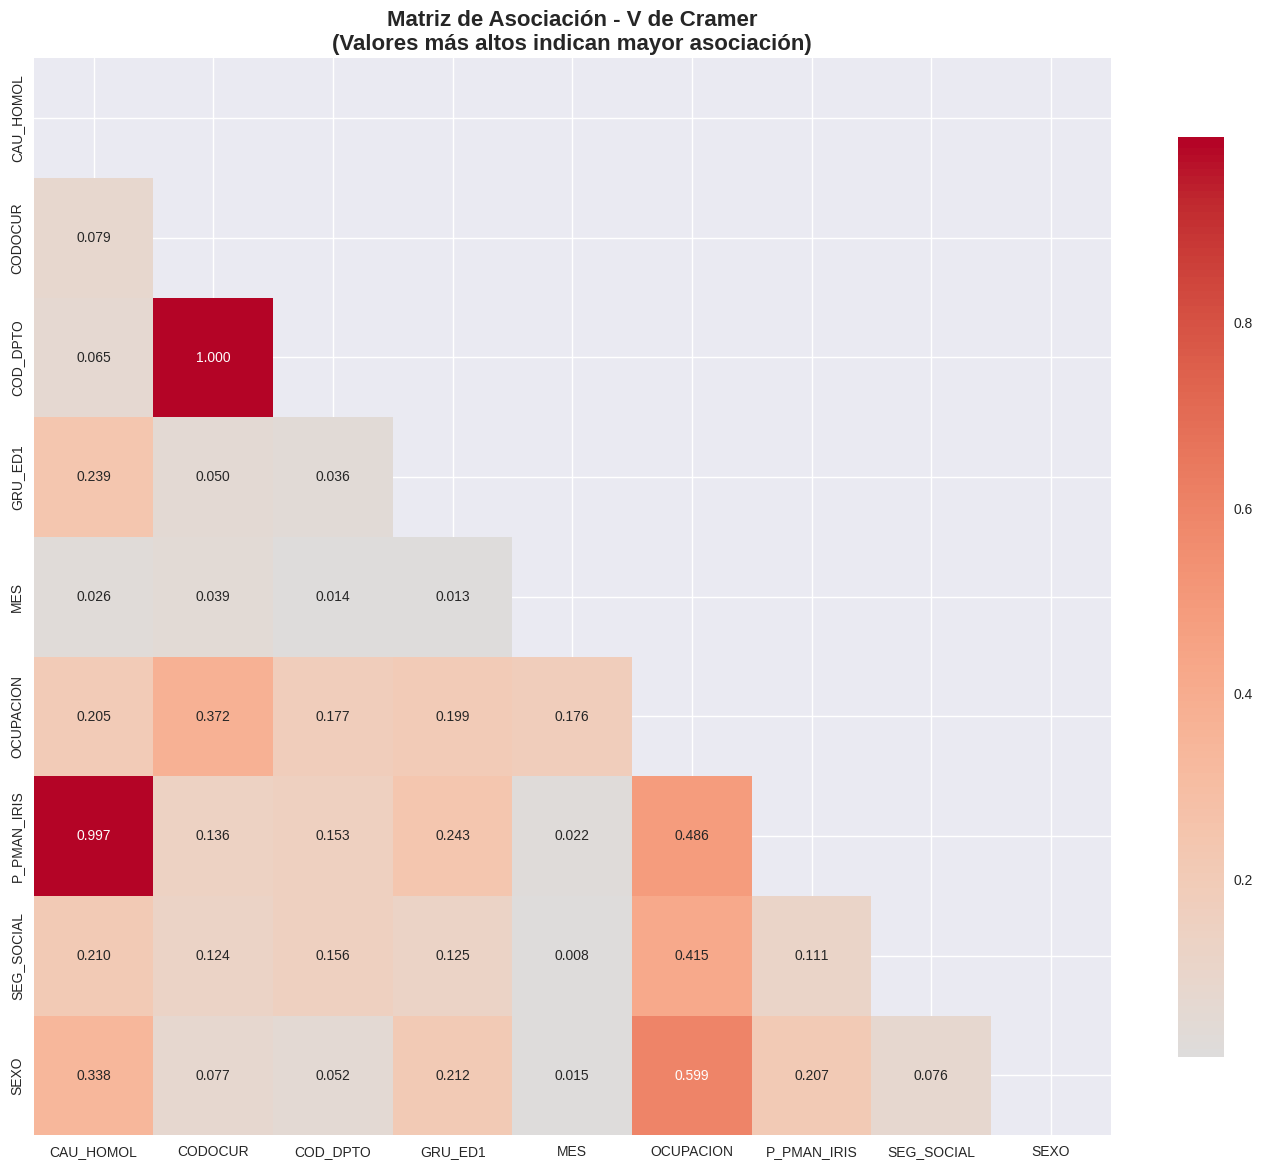

In [38]:
# ========= VISUALIZACIÓN DE RESULTADOS =========

# 1. Matriz de correlaciones (V de Cramer)
print("Creando matriz de correlaciones...")

# Crear matriz simétrica de V de Cramer
variables_unicas = sorted(set(tabla_coeficientes['var1']).union(set(tabla_coeficientes['var2'])))
matriz_v = pd.DataFrame(np.nan, index=variables_unicas, columns=variables_unicas)

# Llenar la matriz diagonal con 1.0
for var in variables_unicas:
    matriz_v.loc[var, var] = 1.0

# Llenar con los valores de V de Cramer
for _, row in tabla_coeficientes.iterrows():
    matriz_v.loc[row['var1'], row['var2']] = row['V_cramer']
    matriz_v.loc[row['var2'], row['var1']] = row['V_cramer']

# Visualizar matriz de calor
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(matriz_v, dtype=bool))  # Máscara para mostrar solo triángulo inferior
sns.heatmap(matriz_v, annot=True, cmap='coolwarm', center=0, fmt='.3f',
            square=True, cbar_kws={'shrink': 0.8}, mask=mask)
plt.title('Matriz de Asociación - V de Cramer\n(Valores más altos indican mayor asociación)',
          fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Top 20 asociaciones más fuertes (V de Cramer):
       var1        var2 V_cramer  p_valor       n
   COD_DPTO     CODOCUR    1.000 0.00e+00  31,612
P_PMAN_IRIS   CAU_HOMOL    0.997 0.00e+00  35,430
       SEXO   OCUPACION    0.599 0.00e+00  13,480
P_PMAN_IRIS   OCUPACION    0.486 1.12e-01     332
 SEG_SOCIAL   OCUPACION    0.415 0.00e+00  13,481
  OCUPACION     CODOCUR    0.372 9.86e-01     249
       SEXO   CAU_HOMOL    0.338 0.00e+00 275,622
    GRU_ED1 P_PMAN_IRIS    0.243 0.00e+00  35,430
    GRU_ED1   CAU_HOMOL    0.239 0.00e+00 275,676
    GRU_ED1        SEXO    0.212 0.00e+00 275,622
 SEG_SOCIAL   CAU_HOMOL    0.210 0.00e+00 275,676
       SEXO P_PMAN_IRIS    0.207 0.00e+00  35,381
  CAU_HOMOL   OCUPACION    0.205 0.00e+00  13,481
    GRU_ED1   OCUPACION    0.199 2.46e-99  13,481
   COD_DPTO   OCUPACION    0.177 2.57e-14  13,481
        MES   OCUPACION    0.176 3.04e-05  13,481
   COD_DPTO  SEG_SOCIAL    0.156 0.00e+00 275,676
   COD_DPTO P_PMAN_IRIS    0.153 0.00e+00  35,430
P_P

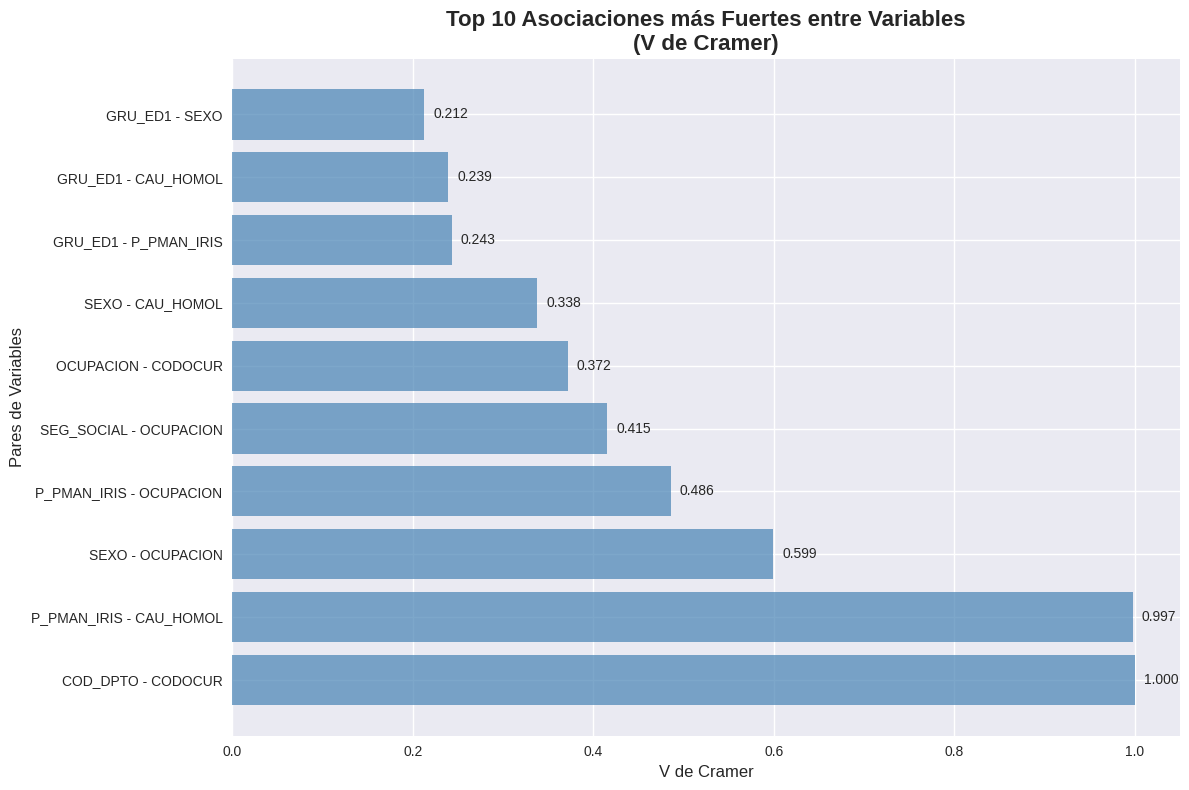

In [39]:
# 2. Top 20 asociaciones más fuertes
print("Top 20 asociaciones más fuertes (V de Cramer):")
top_20 = tabla_coeficientes.nlargest(20, 'V_cramer')[['var1', 'var2', 'V_cramer', 'p_valor', 'n']]
print(top_20.to_string(index=False, formatters={
    'V_cramer': '{:.3f}'.format,
    'p_valor': '{:.2e}'.format,
    'n': '{:,}'.format
}))

# Gráfico de las asociaciones más fuertes
plt.figure(figsize=(12, 8))
top_10 = tabla_coeficientes.nlargest(10, 'V_cramer')
bars = plt.barh(range(len(top_10)), top_10['V_cramer'], color='steelblue', alpha=0.7)
plt.title('Top 10 Asociaciones más Fuertes entre Variables\n(V de Cramer)', fontsize=16, fontweight='bold')
plt.xlabel('V de Cramer', fontsize=12)
plt.ylabel('Pares de Variables', fontsize=12)
plt.yticks(range(len(top_10)), [f"{row['var1']} - {row['var2']}" for _, row in top_10.iterrows()])

# Añadir valores en las barras
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2.,
            f'{width:.3f}', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()